In [1]:
# some useful modules
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import matplotlib.animation as animation
from matplotlib.ticker import LogLocator
import matplotlib.ticker as ticker
from matplotlib.pyplot import cm
import re
# our custom specdist module where all our SD computations are done
import specdist as sd


# let's make a directory wher we save our figures today:
path_to_figures = sd.path_to_sd_projects + "figures/"
subprocess.call(['mkdir','-p',path_to_figures])
print("figure directory: %s"%path_to_figures)


# some labels for the figures
label_intensity = "Intensity, "+r'$\Delta I_x \quad [\mathrm{Jy/sr}]$'
label_scaled_frequency = "Scaled Frequency, "+ r'$x=h\nu/k_{_\mathrm{B}}T_{_\mathrm{CMB}}$'
label_y_firas = r'$y_\mathrm{COBE}=1.5\times 10^{-5}$'
label_mu_firas = r'$\mu_\mathrm{COBE}=9\times 10^{-5}$'
label_redshift = 'Redshift, '+r'$z$'
label_xe = 'Free Electron Fraction, '+r'$X_\mathrm{e}$'

# some conversion factors
xinj_to_mass = 4.698e-4 #m in ev = 4.698e-4 xinj
xinj_to_Einj = 4.698e-4/2. #Einj = 4.698e-4/2 xinj
mass_to_Einj = 1./2.

figure directory: /Users/boris/Work/SPECTRAL-DISTORTIONS/figures/


# Run CosmoTherm in parallel and plot results

In [4]:

# setting up the parameters:
ct = sd.cosmotherm()
ct.ct_Gamma_dec = 1e-14

ct.ct_Drho_rho_dec = 3.e-5
ct.ct_pi_energy_norm = 2
ct.ct_include_pi = 1 
ct.ct_evolve_Xe = 1
ct.ct_zend = 1e-2
ct.ct_zlate = 1e3
ct.ct_reionisation_model = 0
ct.ct_include_collisions = 0
ct.ct_emission_absorption_mode = 0
ct.ct_lyc = 1

ct.ct_npts = 3000


ct.ct_T0 = 2.7255
ct.ct_Yp = 0.245407
ct.ct_N_eff = 3.046
ct.ct_Omega_m = 0.312331
ct.ct_Omega_b = 0.0491137
ct.ct_h = 0.675422

ct.save_Xe = 'yes'


# defining which parameter values we want to compute:
p_name = 'photon injection x_dec'
xinjs = [5e-8,5e-5,5e-2,5e1,5e4]
p_array = xinjs

# the directory name fo the final spectra
ct.save_dir_name = 'many_xinj'


args = {}
args['param_values_array'] = p_array
args['param_name'] = p_name
args['save_spectra'] = 'yes'


# do the run:
# sould take a couple of minutes (~5 minutes on my laptop)
R = ct.run_cosmotherm_parallel(**args)


 ||  Entering CosmoTherm v2.0


 ||  Entering CosmoTherm v2.0


 ||  Entering CosmoTherm v2.0


 ||  Entering CosmoTherm v2.0


 ||  Entering CosmoTherm v2.0


 Using cosmological parameters corresponding to /Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/runfiles/many_xinj/tmp_3/tmp.ini
 Y_p: 0.245407	 TCMB: 2.7255
 Omega_m: 0.312331	 Omega_b: 0.0491137
 Omega_sL: 0	 Omega_k: 0	 Omega_rel: 9.1709e-05 Nnu= 3.046

 Using cosmological parameters corresponding to /Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/runfiles/many_xinj/tmp_4/tmp.ini
 Hubble constant in units of 100 km s-1 Mpc-1: 0.675422
 Y_p: 0.245407	 TCMB: 2.7255
 Fudge factor for H recombination: 1.14

 output-path: /Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/runfiles/many_xinj/tmp_3/
 addname    : .tmp.dat
 Omega_m: 0.312331	 Omega_b: 0.0491137
 Omega_sL: 0	 Omega_k: 0	 Omega_rel: 9.1709e-05 Nnu= 3.046
 Hubble constant in units of 100 km s-1 Mpc-1: 0.675422
 Fudge factor for H recombina

 func_Solve_energetics:: called with f_X = 4.73917e+06 Got Drho/rho_CMB = 3.05884e-06	 with g(f_X) = -2.69412e-05
 func_Solve_energetics:: called with f_X = 4.73917e+06 Got Drho/rho_CMB = 3.05884e-06	 with g(f_X) = -2.69412e-05
 func_Solve_energetics:: called with f_X = 4.73917e+06 Got Drho/rho_CMB = 3.05884e-06	 with g(f_X) = -2.69412e-05
 func_Solve_energetics:: called with f_X = 4.73917e+06 Got Drho/rho_CMB = 3.05884e-06	 with g(f_X) = -2.69412e-05
 func_Solve_energetics:: called with f_X = 4.73917e+08 Got Drho/rho_CMB = 0.000305886	 with g(f_X) = 0.000275886
 func_Solve_energetics:: called with f_X = 4.73917e+08 Got Drho/rho_CMB = 0.000305886	 with g(f_X) = 0.000275886
 func_Solve_energetics:: called with f_X = 4.73917e+08 Got Drho/rho_CMB = 0.000305886	 with g(f_X) = 0.000275886
 func_Solve_energetics:: called with f_X = 4.73917e+08 Got Drho/rho_CMB = 0.000305886	 with g(f_X) = 0.000275886
 func_Solve_energetics:: called with f_X = 4.73917e+08 Got Drho/rho_CMB = 0.000305886	 with 

 DN/N= 4.166192e-15 Drho/rho= 2.601182e-11 (both from int x^k Dn dx)  Tg= 1.362672e+07 (PDE-non-linear)


 z= 4.999750e+06 DG21_G21= 4.166192e-15 DG31_G31= 2.601182e-11 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 5.579013e-11 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.491185e-05

 4.99975e+06 2.30068e-13 1 1.13109e-27 1.94941e-14 0.0818873 1.16377 1.16377 1.36267e+07 1 Drho= 8.36737e-11  Ly-c: -4.26064e-14 -1.17114e-27 -4.54823e-14 
 DN/N= 1.047288e-14 Drho/rho= 5.202741e-11 (both from int x^k Dn dx)  Tg= 1.362604e+07 (PDE-non-linear)


 z= 4.999500e+06 DG21_G21= 1.047288e-14 DG31_G31= 5.202741e-11 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 1.063754e-10 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.491180e-05

 4.9995e+06 2.30051e-13 1 1.13093e-27 1.94927e-14 0.0818873 1.16377 1.1637

 DN/N= 2.063704e-14 Drho/rho= 7.804709e-11 (both from int x^k Dn dx)  Tg= 1.362536e+07 (PDE-non-linear)


 z= 4.999250e+06 DG21_G21= 2.063704e-14 DG31_G31= 7.804709e-11 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 1.547099e-10 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.491175e-05

 4.99925e+06 2.30033e-13 1 1.13076e-27 1.94912e-14 0.0818873 1.16377 1.16377 1.36254e+07 1 Drho= 1.30583e-10  Ly-c: -2.11053e-13 -5.70236e-27 -2.16525e-13 
 DN/N= 4.875095e-11 Drho/rho= 2.011889e-09 (both from int x^k Dn dx)  Tg= 1.357509e+07 (PDE-non-linear)


 z= 4.980808e+06 DG21_G21= 4.875095e-11 DG31_G31= 2.011889e-09 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 3.351428e-09 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.490856e-05

 4.98081e+06 2.28772e-13 1 1.11857e-27 1.93868e-14 0.0818873 1.16377 1.163

 DN/N= 4.155723e-14 Drho/rho= 1.170840e-10 (both from int x^k Dn dx)  Tg= 1.362434e+07 (PDE-non-linear)


 z= 4.998875e+06 DG21_G21= 4.155723e-14 DG31_G31= 1.170840e-10 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 2.250055e-10 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.491168e-05

 4.99888e+06 2.30008e-13 1 1.13051e-27 1.94891e-14 0.0818873 1.16377 1.16377 1.36243e+07 1 Drho= 1.6186e-10  Ly-c: -4.24852e-13 -1.13069e-26 -4.18128e-13 
 DN/N= 1.957629e-12 Drho/rho= 5.935836e-10 (both from int x^k Dn dx)  Tg= 1.361189e+07 (PDE-non-linear)


 z= 4.994307e+06 DG21_G21= 1.957629e-12 DG31_G31= 5.935836e-10 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 1.030670e-09 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.491088e-05

 4.99431e+06 2.29695e-13 1 1.12749e-27 1.94632e-14 0.0818873 1.16377 1.1637

 DN/N= 1.817522e-11 Drho/rho= 1.338553e-09 (both from int x^k Dn dx)  Tg= 1.359251e+07 (PDE-non-linear)


 z= 4.987199e+06 DG21_G21= 1.817522e-11 DG31_G31= 1.338553e-09 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 2.255290e-09 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.490965e-05

 4.9872e+06 2.29209e-13 1 1.12279e-27 1.9423e-14 0.0818873 1.16377 1.16377 1.35925e+07 1 Drho= 9.71245e-10  Ly-c: -4.17455e-11 -8.35826e-25 -2.06673e-11 
 DN/N= 6.728645e-09 Drho/rho= 2.441964e-08 (both from int x^k Dn dx)  Tg= 1.304102e+07 (PDE-non-linear)


 z= 4.784853e+06 DG21_G21= 6.728645e-09 DG31_G31= 2.441964e-08 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 3.679402e-08 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.487511e-05

 4.78485e+06 2.15508e-13 1 9.94428e-28 1.82889e-14 0.0818873 1.16377 1.16377

 DN/N= 1.942148e-14 Drho/rho= 7.804678e-11 (both from int x^k Dn dx)  Tg= 1.362536e+07 (PDE-non-linear)


 z= 4.999250e+06 DG21_G21= 1.942148e-14 DG31_G31= 7.804678e-11 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 1.547357e-10 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.491175e-05

 4.99925e+06 2.30033e-13 1 1.13076e-27 1.94912e-14 0.0818873 1.16377 1.16377 1.36254e+07 1 Drho= 1.30609e-10  Ly-c: -2.10999e-13 -5.70098e-27 -2.16258e-13 
 DN/N= 1.917840e-07 Drho/rho= 3.643170e-07 (both from int x^k Dn dx)  Tg= 9.293920e+06 (PDE-non-linear)


 z= 3.410012e+06 DG21_G21= 1.917840e-07 DG31_G31= 3.643170e-07 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.991960e-07 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.441272e-05

 3.41001e+06 1.30292e-13 1 3.70299e-28 1.12201e-14 0.0818873 1.16377 1.163

 DN/N= 8.506546e-14 Drho/rho= 1.756556e-10 (both from int x^k Dn dx)  Tg= 1.362280e+07 (PDE-non-linear)


 z= 4.998313e+06 DG21_G21= 8.506546e-14 DG31_G31= 1.756556e-10 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 3.277076e-10 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.491158e-05

 4.99831e+06 2.29969e-13 1 1.13014e-27 1.94859e-14 0.0818873 1.16377 1.16377 1.36228e+07 1 Drho= 2.06018e-10  Ly-c: -9.20769e-13 -2.38464e-26 -8.46131e-13 
 DN/N= 6.523959e-07 Drho/rho= 1.463335e-06 (both from int x^k Dn dx)  Tg= 6.293724e+06 (PDE-non-linear)


 z= 2.309216e+06 DG21_G21= 6.523959e-07 DG31_G31= 1.463335e-06 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 2.067965e-06 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.284397e-05

 2.30922e+06 7.31986e-14 1 1.2054e-28 6.45843e-15 0.0818873 1.16377 1.1637

 DN/N= 6.966855e-10 Drho/rho= 6.888471e-09 (both from int x^k Dn dx)  Tg= 1.345151e+07 (PDE-non-linear)


 z= 4.935463e+06 DG21_G21= 6.966855e-10 DG31_G31= 6.888471e-09 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 1.106207e-08 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.490085e-05

 4.93546e+06 2.25679e-13 1 1.08898e-27 1.91309e-14 0.0818873 1.16377 1.16377 1.34515e+07 1 Drho= 4.23074e-09  Ly-c: -2.5117e-10 -4.80656e-24 -1.11245e-10 
 DN/N= 2.120614e-13 Drho/rho= 2.635527e-10 (both from int x^k Dn dx)  Tg= 1.362050e+07 (PDE-non-linear)


 z= 4.997469e+06 DG21_G21= 2.120614e-13 DG31_G31= 2.635527e-10 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.784423e-10 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.491143e-05

 4.99747e+06 2.29912e-13 1 1.12958e-27 1.94812e-14 0.0818873 1.16377 1.1637

 DN/N= 1.352718e-07 Drho/rho= 2.548217e-07 (both from int x^k Dn dx)  Tg= 1.004748e+07 (PDE-non-linear)


 z= 3.686499e+06 DG21_G21= 1.352718e-07 DG31_G31= 2.548217e-07 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 3.485873e-07 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.456333e-05

 3.6865e+06 1.46269e-13 1 4.64421e-28 1.25479e-14 0.0818873 1.16377 1.16377 1.00475e+07 1 Drho= 9.40018e-08  Ly-c: -4.29859e-09 -4.83585e-23 -1.51565e-09 
 DN/N= 6.805336e-09 Drho/rho= 2.441815e-08 (both from int x^k Dn dx)  Tg= 1.304102e+07 (PDE-non-linear)


 z= 4.784853e+06 DG21_G21= 6.805336e-09 DG31_G31= 2.441815e-08 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 3.675223e-08 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.487516e-05

 4.78485e+06 2.15508e-13 1 9.94428e-28 1.82889e-14 0.0818873 1.16377 1.1637

 DN/N= 2.329240e-06 Drho/rho= 9.534412e-06 (both from int x^k Dn dx)  Tg= 3.120207e+06 (PDE-non-linear)


 z= 1.144828e+06 DG21_G21= 2.329240e-06 DG31_G31= 9.534412e-06 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 1.450969e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -4.024362e-07

 1.14483e+06 2.62132e-14 1 1.70409e-29 2.4967e-15 0.0818873 1.16377 1.16377 3.12022e+06 1.00001 Drho= 5.01672e-06  Ly-c: -8.05178e-07 -1.56319e-21 -2.0524e-07 
 DN/N= 4.318951e-07 Drho/rho= 8.818051e-07 (both from int x^k Dn dx)  Tg= 7.355703e+06 (PDE-non-linear)


 z= 2.698864e+06 DG21_G21= 4.318951e-07 DG31_G31= 8.818051e-07 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 1.225486e-06 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.368644e-05

 2.69886e+06 9.21515e-14 1 1.88421e-28 8.04286e-15 0.0818873 1.16377 1

 DN/N= 7.926401e-07 Drho/rho= 1.857819e-06 (both from int x^k Dn dx)  Tg= 5.821695e+06 (PDE-non-linear)


 z= 2.136025e+06 DG21_G21= 7.926401e-07 DG31_G31= 1.857819e-06 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 2.644616e-06 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.226733e-05

 2.13602e+06 6.52529e-14 1 9.65375e-29 5.7926e-15 0.0818873 1.16377 1.16377 5.8217e+06 1 Drho= 7.89944e-07  Ly-c: -7.03786e-08 -3.37237e-22 -2.04774e-08 
 DN/N= 3.430096e-06 Drho/rho= 1.950414e-05 (both from int x^k Dn dx)  Tg= 2.112965e+06 (PDE-non-linear)


 z= 7.752625e+05 DG21_G21= 3.430096e-06 DG31_G31= 1.950414e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 3.041129e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 1.549893e-05

 775263 1.49649e-14 1 6.08948e-30 1.53226e-15 0.0818873 1.16377 1.16377 2.112

 DN/N= 3.966778e-06 Drho/rho= 2.530895e-05 (both from int x^k Dn dx)  Tg= 1.672313e+06 (PDE-non-linear)


 z= 6.135839e+05 DG21_G21= 3.966778e-06 DG31_G31= 2.530895e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 3.970276e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 2.479026e-05

 613584 1.07464e-14 1 3.38477e-30 1.16726e-15 0.0818873 1.16377 1.16377 1.67234e+06 1.00001 Drho= 1.45352e-05  Ly-c: -3.25411e-06 -2.69527e-21 -7.13195e-07 
 DN/N= 2.979594e-10 Drho/rho= 4.561184e-09 (both from int x^k Dn dx)  Tg= 1.350993e+07 (PDE-non-linear)


 z= 4.956901e+06 DG21_G21= 2.979594e-10 DG31_G31= 4.561184e-09 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 7.429906e-09 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.490448e-05

 4.9569e+06 2.27139e-13 1 1.1029e-27 1.92517e-14 0.0818873 1.16377 1.16377

 DN/N= 4.479829e-06 Drho/rho= 2.931232e-05 (both from int x^k Dn dx)  Tg= 1.207976e+06 (PDE-non-linear)


 z= 4.432149e+05 DG21_G21= 4.479829e-06 DG31_G31= 2.931232e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.594292e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.103033e-05

 443215 6.84101e-15 1 1.57465e-30 8.28534e-16 0.0818873 1.16377 1.16377 1.208e+06 1.00002 Drho= 1.66935e-05  Ly-c: -4.12194e-06 -2.4889e-21 -7.71346e-07 
 DN/N= 3.262966e-09 Drho/rho= 1.590392e-08 (both from int x^k Dn dx)  Tg= 1.323419e+07 (PDE-non-linear)


 z= 4.855729e+06 DG21_G21= 3.262966e-09 DG31_G31= 1.590392e-08 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 2.458155e-08 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.488733e-05

 4.85573e+06 2.20275e-13 1 1.03821e-27 1.86835e-14 0.0818873 1.16377 1.16377 

 DN/N= 4.664727e-06 Drho/rho= 2.976462e-05 (both from int x^k Dn dx)  Tg= 1.006211e+06 (PDE-non-linear)


 z= 3.691856e+05 DG21_G21= 4.664727e-06 DG31_G31= 2.976462e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.653768e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.162508e-05

 369186 5.33866e-15 1 1.05952e-30 6.99479e-16 0.0818873 1.16377 1.16377 1.00623e+06 1.00002 Drho= 1.67892e-05  Ly-c: -4.62816e-06 -2.13232e-21 -6.99721e-07 
 DN/N= 4.690008e-06 Drho/rho= 2.978728e-05 (both from int x^k Dn dx)  Tg= 9.760244e+05 (PDE-non-linear)


 z= 3.581101e+05 DG21_G21= 4.690008e-06 DG31_G31= 2.978728e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.655586e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.164326e-05

 358110 5.12497e-15 1 9.94604e-31 6.81336e-16 0.0818873 1.16377 1.16377 976

 DN/N= 4.833362e-06 Drho/rho= 2.982853e-05 (both from int x^k Dn dx)  Tg= 7.886115e+05 (PDE-non-linear)


 z= 2.893468e+05 DG21_G21= 4.833362e-06 DG31_G31= 2.982853e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.652943e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.161683e-05

 289347 3.86788e-15 1 6.55757e-31 5.77078e-16 0.0818873 1.16377 1.16377 788625 1.00002 Drho= 1.67008e-05  Ly-c: -4.62925e-06 -1.73627e-21 -5.63538e-07 
 DN/N= 4.849866e-06 Drho/rho= 2.982900e-05 (both from int x^k Dn dx)  Tg= 7.649533e+05 (PDE-non-linear)


 z= 2.806664e+05 DG21_G21= 4.849866e-06 DG31_G31= 2.982900e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.652089e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.160829e-05

 280666 3.71807e-15 1 6.20386e-31 5.65128e-16 0.0818873 1.16377 1.16377 764966 1

 DN/N= 1.333482e-08 Drho/rho= 3.794878e-08 (both from int x^k Dn dx)  Tg= 1.275549e+07 (PDE-non-linear)


 z= 4.680090e+06 DG21_G21= 1.333482e-08 DG31_G31= 3.794878e-08 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 5.560671e-08 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.485630e-05

 4.68009e+06 2.08526e-13 1 9.31996e-28 1.77107e-14 0.0818873 1.16377 1.16377 1.27555e+07 1 Drho= 1.77315e-08  Ly-c: -9.32864e-10 -1.60574e-23 -3.93919e-10 
 DN/N= 4.956391e-06 Drho/rho= 2.982953e-05 (both from int x^k Dn dx)  Tg= 5.995276e+05 (PDE-non-linear)


 z= 2.199704e+05 DG21_G21= 4.956391e-06 DG31_G31= 2.982953e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.646713e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.155453e-05

 219970 2.7308e-15 1 4.15676e-31 4.92408e-16 0.0818873 1.16377 1.16377 5995

 DN/N= 5.038041e-06 Drho/rho= 2.982953e-05 (both from int x^k Dn dx)  Tg= 4.557802e+05 (PDE-non-linear)


 z= 1.672283e+05 DG21_G21= 5.038041e-06 DG31_G31= 2.982953e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.643081e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.151821e-05

 167228 1.96677e-15 1 2.95798e-31 4.54995e-16 0.0818873 1.16377 1.16377 455788 1.00002 Drho= 1.66005e-05  Ly-c: -4.97116e-06 -1.17898e-21 1.30218e-07 
 DN/N= 4.711074e-08 Drho/rho= 9.789861e-08 (both from int x^k Dn dx)  Tg= 1.172884e+07 (PDE-non-linear)


 z= 4.303403e+06 DG21_G21= 4.711074e-08 DG31_G31= 9.789861e-08 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 1.365564e-07 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.477535e-05

 4.3034e+06 1.84064e-13 1 7.29157e-28 1.56839e-14 0.0818873 1.16377 1.16377 1.17

 DN/N= 5.099942e-06 Drho/rho= 2.982945e-05 (both from int x^k Dn dx)  Tg= 3.361040e+05 (PDE-non-linear)


 z= 1.233182e+05 DG21_G21= 5.099942e-06 DG31_G31= 2.982945e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.640722e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.149462e-05

 123318 1.40884e-15 1 2.42748e-31 4.7187e-16 0.0818873 1.16377 1.16377 336110 1.00002 Drho= 1.65768e-05  Ly-c: -4.62082e-06 -8.70813e-22 9.01515e-07 
 DN/N= 2.836734e-06 Drho/rho= 1.317009e-05 (both from int x^k Dn dx)  Tg= 2.669728e+06 (PDE-non-linear)


 z= 9.795432e+05 DG21_G21= 2.836734e-06 DG31_G31= 1.317009e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 2.025312e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 5.340912e-06

 979543 2.09247e-14 1 1.12182e-29 2.04468e-15 0.0818873 1.16377 1.16377 2.66975e+0

 DN/N= 3.290612e-06 Drho/rho= 1.734657e-05 (both from int x^k Dn dx)  Tg= 2.284286e+06 (PDE-non-linear)


 z= 8.381216e+05 DG21_G21= 3.290612e-06 DG31_G31= 1.734657e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 2.691984e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 1.200754e-05

 838122 1.67273e-14 1 7.44734e-30 1.68417e-15 0.0818873 1.16377 1.16377 2.28431e+06 1.00001 Drho= 9.67517e-06  Ly-c: -1.85477e-06 -2.3563e-21 -4.46333e-07 
 DN/N= 5.139275e-06 Drho/rho= 2.982933e-05 (both from int x^k Dn dx)  Tg= 2.555174e+05 (PDE-non-linear)


 z= 9.375034e+04 DG21_G21= 5.139275e-06 DG31_G31= 2.982933e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.639467e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.148207e-05

 93750.3 1.08289e-15 1 2.52102e-31 5.65684e-16 0.0818873 1.16377 1.16377 255

 DN/N= 1.345910e-07 Drho/rho= 2.547606e-07 (both from int x^k Dn dx)  Tg= 1.004748e+07 (PDE-non-linear)


 z= 3.686499e+06 DG21_G21= 1.345910e-07 DG31_G31= 2.547606e-07 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 3.488423e-07 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.456307e-05

 3.6865e+06 1.46269e-13 1 4.64421e-28 1.25479e-14 0.0818873 1.16377 1.16377 1.00475e+07 1 Drho= 9.43178e-08  Ly-c: -4.34268e-09 -4.92621e-23 -1.54259e-09 
 DN/N= 5.159563e-06 Drho/rho= 2.982924e-05 (both from int x^k Dn dx)  Tg= 2.128393e+05 (PDE-non-linear)


 z= 7.809141e+04 DG21_G21= 5.159563e-06 DG31_G31= 2.982924e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.638913e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.147653e-05

 78091.4 9.31766e-16 1 2.9916e-31 7.05877e-16 0.0818873 1.16377 1.16377 2128

 DN/N= 5.176289e-06 Drho/rho= 2.982912e-05 (both from int x^k Dn dx)  Tg= 1.772896e+05 (PDE-non-linear)


 z= 6.504796e+04 DG21_G21= 5.176289e-06 DG31_G31= 2.982912e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.638510e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.147250e-05

 65048 8.21893e-16 1 4.10096e-31 9.72829e-16 0.0818873 1.16377 1.16377 177293 1.00002 Drho= 1.65545e-05  Ly-c: -2.76642e-06 1.63876e-21 4.63238e-06 
 DN/N= 4.061814e-06 Drho/rho= 2.530954e-05 (both from int x^k Dn dx)  Tg= 1.672313e+06 (PDE-non-linear)


 z= 6.135839e+05 DG21_G21= 4.061814e-06 DG31_G31= 2.530954e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 3.965585e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 2.474335e-05

 613584 1.07464e-14 1 3.3847e-30 1.16726e-15 0.0818873 1.16377 1.16377 1.67234e+06 

 DN/N= 4.352836e-06 Drho/rho= 2.789640e-05 (both from int x^k Dn dx)  Tg= 1.430873e+06 (PDE-non-linear)


 z= 5.249978e+05 DG21_G21= 4.352836e-06 DG31_G31= 2.789640e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.373595e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 2.882339e-05

 524998 8.64168e-15 1 2.3255e-30 9.84607e-16 0.0818873 1.16377 1.16377 1.4309e+06 1.00002 Drho= 1.59562e-05  Ly-c: -3.79436e-06 -2.72591e-21 -7.62829e-07 
 DN/N= 5.190181e-06 Drho/rho= 2.982899e-05 (both from int x^k Dn dx)  Tg= 1.476777e+05 (PDE-non-linear)


 z= 5.418313e+04 DG21_G21= 5.190181e-06 DG31_G31= 2.982899e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.638212e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.146952e-05

 54183.1 7.46913e-16 1 6.68472e-31 1.5106e-15 0.0818873 1.16377 1.16377 14768

 DN/N= 5.205237e-06 Drho/rho= 2.982878e-05 (both from int x^k Dn dx)  Tg= 1.157420e+05 (PDE-non-linear)


 z= 4.246566e+04 DG21_G21= 5.205237e-06 DG31_G31= 2.982878e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.637924e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.146664e-05

 42465.7 6.95946e-16 1 1.78451e-30 3.41041e-15 0.0818873 1.16377 1.16377 115744 1.00002 Drho= 1.65482e-05  Ly-c: 6.37353e-07 2.51369e-20 1.05339e-05 
 DN/N= 4.558063e-06 Drho/rho= 2.914970e-05 (both from int x^k Dn dx)  Tg= 1.245336e+06 (PDE-non-linear)


 z= 4.569226e+05 DG21_G21= 4.558063e-06 DG31_G31= 2.914970e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.564716e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.073458e-05

 456923 7.1328e-15 1 1.6865e-30 8.53773e-16 0.0818873 1.16377 1.16377 1.24536e+06 

 DN/N= 4.668409e-06 Drho/rho= 2.954758e-05 (both from int x^k Dn dx)  Tg= 1.136585e+06 (PDE-non-linear)


 z= 4.170209e+05 DG21_G21= 4.668409e-06 DG31_G31= 2.954758e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.621339e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.130079e-05

 417021 6.295e-15 1 1.37562e-30 7.81419e-16 0.0818873 1.16377 1.16377 1.1366e+06 1.00002 Drho= 1.67098e-05  Ly-c: -4.33051e-06 -2.29541e-21 -7.51579e-07 
 DN/N= 5.218526e-06 Drho/rho= 2.982847e-05 (both from int x^k Dn dx)  Tg= 8.799134e+04 (PDE-non-linear)


 z= 3.228372e+04 DG21_G21= 5.218526e-06 DG31_G31= 2.982847e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.637689e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.146429e-05

 32283.7 7.09144e-16 1 9.5357e-30 1.26337e-14 0.0818873 1.16377 1.16377 87992.

 DN/N= 4.761929e-06 Drho/rho= 2.973283e-05 (both from int x^k Dn dx)  Tg= 1.037331e+06 (PDE-non-linear)


 z= 3.806037e+05 DG21_G21= 4.761929e-06 DG31_G31= 2.973283e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.644366e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.153106e-05

 380604 5.56203e-15 1 1.12963e-30 7.18524e-16 0.0818873 1.16377 1.16377 1.03735e+06 1.00002 Drho= 1.67325e-05  Ly-c: -4.42136e-06 -2.1665e-21 -7.07446e-07 
 DN/N= 5.224596e-06 Drho/rho= 2.982826e-05 (both from int x^k Dn dx)  Tg= 7.556154e+04 (PDE-non-linear)


 z= 2.772313e+04 DG21_G21= 5.224596e-06 DG31_G31= 2.982826e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.637578e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.146318e-05

 27723.1 7.57955e-16 1 3.3518e-29 3.27346e-14 0.0818873 1.16377 1.16377 7556

 DN/N= 5.229896e-06 Drho/rho= 2.982801e-05 (both from int x^k Dn dx)  Tg= 6.488765e+04 (PDE-non-linear)


 z= 2.380679e+04 DG21_G21= 5.229896e-06 DG31_G31= 2.982801e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.637470e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.146210e-05

 23806.8 8.50412e-16 1 1.56355e-28 1.03041e-13 0.0818873 1.16377 1.16377 64888.7 1.00002 Drho= 1.65419e-05  Ly-c: 1.13727e-05 2.59552e-18 2.83342e-05 
 DN/N= 5.230873e-06 Drho/rho= 2.982795e-05 (both from int x^k Dn dx)  Tg= 6.294111e+04 (PDE-non-linear)


 z= 2.309259e+04 DG21_G21= 5.230873e-06 DG31_G31= 2.982795e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.637448e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.146188e-05

 23092.6 8.75892e-16 1 2.2092e-28 1.33011e-13 0.0818873 1.16377 1.16377 62942.1 1

 DN/N= 3.716737e-06 Drho/rho= 2.160763e-05 (both from int x^k Dn dx)  Tg= 1.954493e+06 (PDE-non-linear)


 z= 7.171178e+05 DG21_G21= 3.716737e-06 DG31_G31= 2.160763e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 3.373688e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 1.882447e-05

 717118 1.33943e-14 1 4.99211e-30 1.39659e-15 0.0818873 1.16377 1.16377 1.95452e+06 1.00001 Drho= 1.22613e-05  Ly-c: -2.54291e-06 -2.59849e-21 -5.87774e-07 
 DN/N= 5.235387e-06 Drho/rho= 2.982764e-05 (both from int x^k Dn dx)  Tg= 5.405005e+04 (PDE-non-linear)


 z= 1.983039e+04 DG21_G21= 5.235387e-06 DG31_G31= 2.982764e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.637330e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.146071e-05

 19830.4 1.0528e-15 1 1.53548e-27 5.51226e-13 0.0818873 1.16377 1.16377 540

 DN/N= 5.238591e-06 Drho/rho= 2.982735e-05 (both from int x^k Dn dx)  Tg= 4.785044e+04 (PDE-non-linear)


 z= 1.755570e+04 DG21_G21= 5.238591e-06 DG31_G31= 2.982735e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.637223e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145963e-05

 17555.7 1.28014e-15 1 9.60071e-27 2.08678e-12 0.0818873 1.16377 1.16377 47851.2 1.00002 Drho= 1.65375e-05  Ly-c: 2.26639e-05 9.14076e-17 4.56961e-05 
 DN/N= 9.342878e-07 Drho/rho= 2.338439e-06 (both from int x^k Dn dx)  Tg= 5.385068e+06 (PDE-non-linear)


 z= 1.975823e+06 DG21_G21= 9.342878e-07 DG31_G31= 2.338439e-06 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 3.362600e-06 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.154936e-05

 1.97582e+06 5.81794e-14 1 7.73893e-29 5.19883e-15 0.0818873 1.16377 1.16377 5.3

 DN/N= 5.069239e-06 Drho/rho= 2.982996e-05 (both from int x^k Dn dx)  Tg= 6.371851e+05 (PDE-non-linear)


 z= 2.337872e+05 DG21_G21= 5.069239e-06 DG31_G31= 2.982996e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.641012e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.149753e-05

 233787 2.94593e-15 1 4.55914e-31 5.06963e-16 0.0818873 1.16377 1.16377 637196 1.00002 Drho= 1.65795e-05  Ly-c: -4.85562e-06 -1.47085e-21 -3.5839e-07 
 DN/N= 1.097577e-06 Drho/rho= 2.922349e-06 (both from int x^k Dn dx)  Tg= 4.981188e+06 (PDE-non-linear)


 z= 1.827636e+06 DG21_G21= 1.097577e-06 DG31_G31= 2.922349e-06 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.239796e-06 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -1.067218e-05

 1.82764e+06 5.18819e-14 1 6.21036e-29 4.66926e-15 0.0818873 1.16377 1.16377 4.9

 DN/N= 5.114656e-06 Drho/rho= 2.982997e-05 (both from int x^k Dn dx)  Tg= 5.640957e+05 (PDE-non-linear)


 z= 2.069702e+05 DG21_G21= 5.114656e-06 DG31_G31= 2.982997e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.638846e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.147586e-05

 206970 2.53386e-15 1 3.81141e-31 4.80143e-16 0.0818873 1.16377 1.16377 564105 1.00002 Drho= 1.65577e-05  Ly-c: -4.79186e-06 -1.34746e-21 -2.09185e-07 
 DN/N= 4.368295e-06 Drho/rho= 2.789595e-05 (both from int x^k Dn dx)  Tg= 1.430873e+06 (PDE-non-linear)


 z= 5.249978e+05 DG21_G21= 4.368295e-06 DG31_G31= 2.789595e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.372749e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 2.881493e-05

 524998 8.64175e-15 1 2.32552e-30 9.84607e-16 0.0818873 1.16377 1.16377 1.4309e+

 DN/N= 1.466217e-06 Drho/rho= 4.468264e-06 (both from int x^k Dn dx)  Tg= 4.262029e+06 (PDE-non-linear)


 z= 1.563771e+06 DG21_G21= 1.466217e-06 DG31_G31= 4.468264e-06 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 6.596677e-06 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = -8.315329e-06

 1.56377e+06 4.12828e-14 1 4.01324e-29 3.77542e-15 0.0818873 1.16377 1.16377 4.26204e+06 1 Drho= 2.14082e-06  Ly-c: -2.676e-07 -8.06537e-22 -7.64437e-08 
 DN/N= 5.169286e-06 Drho/rho= 2.982996e-05 (both from int x^k Dn dx)  Tg= 4.698764e+05 (PDE-non-linear)


 z= 1.724004e+05 DG21_G21= 5.169286e-06 DG31_G31= 2.982996e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636420e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145161e-05

 172400 2.03744e-15 1 3.05125e-31 4.56876e-16 0.0818873 1.16377 1.16377 46988

 DN/N= 5.244673e-06 Drho/rho= 2.982649e-05 (both from int x^k Dn dx)  Tg= 3.637804e+04 (PDE-non-linear)


 z= 1.334639e+04 DG21_G21= 5.244673e-06 DG31_G31= 2.982649e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636895e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145635e-05

 13346.4 2.40076e-15 1 1.77114e-24 8.87075e-11 0.0818873 1.16377 1.16377 36378.6 1.00002 Drho= 1.65315e-05  Ly-c: 3.8518e-05 6.1006e-15 6.89595e-05 
 DN/N= 4.650777e-06 Drho/rho= 2.944354e-05 (both from int x^k Dn dx)  Tg= 1.171737e+06 (PDE-non-linear)


 z= 4.299185e+05 DG21_G21= 4.650777e-06 DG31_G31= 2.944354e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.606173e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.114913e-05

 429918 6.56192e-15 1 1.47125e-30 8.0443e-16 0.0818873 1.16377 1.16377 1.17176e+06 

 DN/N= 5.240426e-06 Drho/rho= 2.982988e-05 (both from int x^k Dn dx)  Tg= 3.361040e+05 (PDE-non-linear)


 z= 1.233182e+05 DG21_G21= 5.240426e-06 DG31_G31= 2.982988e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.633646e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.142387e-05

 123318 1.40884e-15 1 2.42748e-31 4.71871e-16 0.0818873 1.16377 1.16377 336110 1.00002 Drho= 1.65057e-05  Ly-c: -4.64392e-06 -8.62644e-22 9.08198e-07 
 DN/N= 4.718894e-06 Drho/rho= 2.962706e-05 (both from int x^k Dn dx)  Tg= 1.102487e+06 (PDE-non-linear)


 z= 4.045103e+05 DG21_G21= 4.718894e-06 DG31_G31= 2.962706e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.630882e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.139623e-05

 404510 6.03969e-15 1 1.28716e-30 7.59457e-16 0.0818873 1.16377 1.16377 1.10251e+

 DN/N= 5.272562e-06 Drho/rho= 2.982979e-05 (both from int x^k Dn dx)  Tg= 2.715668e+05 (PDE-non-linear)


 z= 9.963900e+04 DG21_G21= 5.272562e-06 DG31_G31= 2.982979e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.632586e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.141326e-05

 99639 1.14398e-15 1 2.44827e-31 5.35586e-16 0.0818873 1.16377 1.16377 271571 1.00002 Drho= 1.64951e-05  Ly-c: -4.22218e-06 -5.6449e-22 1.74039e-06 
 DN/N= 5.276537e-06 Drho/rho= 2.982977e-05 (both from int x^k Dn dx)  Tg= 2.634199e+05 (PDE-non-linear)


 z= 9.664983e+04 DG21_G21= 5.276537e-06 DG31_G31= 2.982977e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.632465e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.141205e-05

 96649.8 1.1127e-15 1 2.48037e-31 5.49818e-16 0.0818873 1.16377 1.16377 263424 1.00

 DN/N= 5.287676e-06 Drho/rho= 2.982973e-05 (both from int x^k Dn dx)  Tg= 2.404164e+05 (PDE-non-linear)


 z= 8.820969e+04 DG21_G21= 5.287676e-06 DG31_G31= 2.982973e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.632139e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.140879e-05

 88209.7 1.02741e-15 1 2.63072e-31 6.02979e-16 0.0818873 1.16377 1.16377 240420 1.00002 Drho= 1.64906e-05  Ly-c: -3.96794e-06 -2.74775e-22 2.36966e-06 
 DN/N= 4.905728e-06 Drho/rho= 2.981952e-05 (both from int x^k Dn dx)  Tg= 8.907914e+05 (PDE-non-linear)


 z= 3.268374e+05 DG21_G21= 4.905728e-06 DG31_G31= 2.981952e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.648647e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.157387e-05

 326837 4.53818e-15 1 8.27182e-31 6.31999e-16 0.0818873 1.16377 1.16377 890806 1

 DN/N= 5.018148e-06 Drho/rho= 2.982907e-05 (both from int x^k Dn dx)  Tg= 7.420047e+05 (PDE-non-linear)


 z= 2.722464e+05 DG21_G21= 5.018148e-06 DG31_G31= 2.982907e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.643526e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.152266e-05

 272246 3.57475e-15 1 5.87579e-31 5.53849e-16 0.0818873 1.16377 1.16377 742017 1.00002 Drho= 1.66057e-05  Ly-c: -4.78256e-06 -1.65288e-21 -5.08221e-07 
 DN/N= 5.033722e-06 Drho/rho= 2.982921e-05 (both from int x^k Dn dx)  Tg= 7.197447e+05 (PDE-non-linear)


 z= 2.640790e+05 DG21_G21= 5.033722e-06 DG31_G31= 2.982921e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.642715e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.151455e-05

 264079 3.43762e-15 1 5.57148e-31 5.43225e-16 0.0818873 1.16377 1.16377 719757 1

 DN/N= 5.309713e-06 Drho/rho= 2.982960e-05 (both from int x^k Dn dx)  Tg= 1.942529e+05 (PDE-non-linear)


 z= 7.127192e+04 DG21_G21= 5.309713e-06 DG31_G31= 2.982960e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.631555e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.140295e-05

 71271.9 8.72141e-16 1 3.43425e-31 8.17494e-16 0.0818873 1.16377 1.16377 194256 1.00002 Drho= 1.64846e-05  Ly-c: -3.15844e-06 7.83482e-22 3.83607e-06 
 DN/N= 4.114438e-06 Drho/rho= 2.676252e-05 (both from int x^k Dn dx)  Tg= 1.546890e+06 (PDE-non-linear)


 z= 5.675651e+05 DG21_G21= 4.114438e-06 DG31_G31= 2.676252e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.200930e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 2.709676e-05

 567565 9.63397e-15 1 2.80046e-30 1.07072e-15 0.0818873 1.16377 1.16377 1.54691e+

 DN/N= 5.322676e-06 Drho/rho= 2.982950e-05 (both from int x^k Dn dx)  Tg= 1.668120e+05 (PDE-non-linear)


 z= 6.120362e+04 DG21_G21= 5.322676e-06 DG31_G31= 2.982950e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.631251e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.139991e-05

 61203.6 7.93249e-16 1 4.72686e-31 1.11048e-15 0.0818873 1.16377 1.16377 166815 1.00002 Drho= 1.64815e-05  Ly-c: -2.33966e-06 2.55072e-21 5.2413e-06 
 DN/N= 4.442684e-06 Drho/rho= 2.914920e-05 (both from int x^k Dn dx)  Tg= 1.245336e+06 (PDE-non-linear)


 z= 4.569226e+05 DG21_G21= 4.442684e-06 DG31_G31= 2.914920e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.570447e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.079188e-05

 456923 7.13278e-15 1 1.68653e-30 8.53774e-16 0.0818873 1.16377 1.16377 1.24536e+0

 DN/N= 3.966779e-06 Drho/rho= 2.530902e-05 (both from int x^k Dn dx)  Tg= 1.672313e+06 (PDE-non-linear)


 z= 6.135839e+05 DG21_G21= 3.966779e-06 DG31_G31= 2.530902e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 3.970288e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 2.479038e-05

 613584 1.07464e-14 1 3.38475e-30 1.16726e-15 0.0818873 1.16377 1.16377 1.67234e+06 1.00001 Drho= 1.45352e-05  Ly-c: -3.25413e-06 -2.69521e-21 -7.13196e-07 
 DN/N= 5.172626e-06 Drho/rho= 2.982932e-05 (both from int x^k Dn dx)  Tg= 4.993902e+05 (PDE-non-linear)


 z= 1.832292e+05 DG21_G21= 5.172626e-06 DG31_G31= 2.982932e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636021e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144761e-05

 183229 2.18853e-15 1 3.26421e-31 4.62371e-16 0.0818873 1.16377 1.16377 499

 DN/N= 5.339676e-06 Drho/rho= 2.982931e-05 (both from int x^k Dn dx)  Tg= 1.307383e+05 (PDE-non-linear)


 z= 4.796793e+04 DG21_G21= 5.339676e-06 DG31_G31= 2.982931e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.630898e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.139638e-05

 47967.9 7.14542e-16 1 1.03672e-30 2.18971e-15 0.0818873 1.16377 1.16377 130741 1.00002 Drho= 1.64777e-05  Ly-c: -5.69796e-07 1.16647e-20 8.36991e-06 
 DN/N= 5.189362e-06 Drho/rho= 2.982931e-05 (both from int x^k Dn dx)  Tg= 4.698764e+05 (PDE-non-linear)


 z= 1.724004e+05 DG21_G21= 5.189362e-06 DG31_G31= 2.982931e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635299e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144040e-05

 172400 2.03744e-15 1 3.05124e-31 4.56876e-16 0.0818873 1.16377 1.16377 469884 1.

 DN/N= 5.350023e-06 Drho/rho= 2.982913e-05 (both from int x^k Dn dx)  Tg= 1.089018e+05 (PDE-non-linear)


 z= 3.995594e+04 DG21_G21= 5.350023e-06 DG31_G31= 2.982913e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.630704e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.139444e-05

 39955.9 6.91962e-16 1 2.44487e-30 4.38497e-15 0.0818873 1.16377 1.16377 108904 1.00002 Drho= 1.64755e-05  Ly-c: 1.37618e-06 3.75218e-20 1.1685e-05 
 DN/N= 5.248510e-06 Drho/rho= 2.982570e-05 (both from int x^k Dn dx)  Tg= 2.939336e+04 (PDE-non-linear)


 z= 1.078365e+04 DG21_G21= 5.248510e-06 DG31_G31= 2.982570e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636551e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145291e-05

 10783.7 4.8879e-15 1 3.72634e-22 3.98544e-09 0.0818873 1.16377 1.16377 29393.8 1.0

 DN/N= 5.357382e-06 Drho/rho= 2.982896e-05 (both from int x^k Dn dx)  Tg= 9.351810e+04 (PDE-non-linear)


 z= 3.431153e+04 DG21_G21= 5.357382e-06 DG31_G31= 2.982896e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.630572e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.139312e-05

 34311.5 6.98861e-16 1 6.18464e-30 9.05799e-15 0.0818873 1.16377 1.16377 93519.6 1.00002 Drho= 1.64738e-05  Ly-c: 3.4938e-06 1.09695e-19 1.52758e-05 
 DN/N= 4.362062e-06 Drho/rho= 2.871104e-05 (both from int x^k Dn dx)  Tg= 1.323558e+06 (PDE-non-linear)


 z= 4.856229e+05 DG21_G21= 4.362062e-06 DG31_G31= 2.871104e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.504634e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.013376e-05

 485623 7.75703e-15 1 1.93857e-30 9.07849e-16 0.0818873 1.16377 1.16377 1.32358e+0

 DN/N= 5.249009e-06 Drho/rho= 2.982561e-05 (both from int x^k Dn dx)  Tg= 2.851164e+04 (PDE-non-linear)


 z= 1.046014e+04 DG21_G21= 5.249009e-06 DG31_G31= 2.982561e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636517e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145257e-05

 10460.1 5.51294e-15 1 8.92296e-22 7.39907e-09 0.0818873 1.16377 1.16377 28512.1 1.00002 Drho= 1.65208e-05  Ly-c: 5.96153e-05 7.54437e-13 3.15418e-05 
 DN/N= 5.362570e-06 Drho/rho= 2.982881e-05 (both from int x^k Dn dx)  Tg= 8.279121e+04 (PDE-non-linear)


 z= 3.037575e+04 DG21_G21= 5.362570e-06 DG31_G31= 2.982881e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.630478e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.139218e-05

 30375.7 7.24386e-16 1 1.5284e-29 1.80976e-14 0.0818873 1.16377 1.16377 82792.6 1

 DN/N= 4.945307e-06 Drho/rho= 2.982947e-05 (both from int x^k Dn dx)  Tg= 6.180696e+05 (PDE-non-linear)


 z= 2.267736e+05 DG21_G21= 4.945307e-06 DG31_G31= 2.982947e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.647235e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.155975e-05

 226774 2.83599e-15 1 4.35031e-31 4.99396e-16 0.0818873 1.16377 1.16377 618080 1.00002 Drho= 1.66421e-05  Ly-c: -4.92358e-06 -1.44351e-21 -3.37854e-07 
 DN/N= 5.367215e-06 Drho/rho= 2.982863e-05 (both from int x^k Dn dx)  Tg= 7.329478e+04 (PDE-non-linear)


 z= 2.689143e+04 DG21_G21= 5.367215e-06 DG31_G31= 2.982863e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.630390e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.139130e-05

 26891.4 7.72416e-16 1 4.45305e-29 4.05002e-14 0.0818873 1.16377 1.16377 73296 1

 DN/N= 5.249497e-06 Drho/rho= 2.982555e-05 (both from int x^k Dn dx)  Tg= 2.765637e+04 (PDE-non-linear)


 z= 1.014634e+04 DG21_G21= 5.249497e-06 DG31_G31= 2.982555e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636495e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145235e-05

 10146.3 6.24992e-15 1 2.20135e-21 1.40217e-08 0.0818873 1.16377 1.16377 27656.8 1.00002 Drho= 1.65187e-05  Ly-c: 6.29232e-05 1.50057e-12 1.2651e-05 
 DN/N= 5.371380e-06 Drho/rho= 2.982843e-05 (both from int x^k Dn dx)  Tg= 6.488765e+04 (PDE-non-linear)


 z= 2.380679e+04 DG21_G21= 5.371380e-06 DG31_G31= 2.982843e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.630302e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.139042e-05

 23806.8 8.50411e-16 1 1.5632e-28 1.03031e-13 0.0818873 1.16377 1.16377 64888.7 1.

 DN/N= 5.300771e-06 Drho/rho= 2.982909e-05 (both from int x^k Dn dx)  Tg= 2.555174e+05 (PDE-non-linear)


 z= 9.375034e+04 DG21_G21= 5.300771e-06 DG31_G31= 2.982909e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.631207e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.139947e-05

 93750.3 1.08289e-15 1 2.52108e-31 5.65698e-16 0.0818873 1.16377 1.16377 255522 1.00002 Drho= 1.64819e-05  Ly-c: -4.06899e-06 -4.24684e-22 2.03866e-06 
 DN/N= 4.996758e-06 Drho/rho= 2.982949e-05 (both from int x^k Dn dx)  Tg= 5.307578e+05 (PDE-non-linear)


 z= 1.947382e+05 DG21_G21= 4.996758e-06 DG31_G31= 2.982949e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.644848e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.153588e-05

 194738 2.35358e-15 1 3.51593e-31 4.70134e-16 0.0818873 1.16377 1.16377 530767 1

 DN/N= 5.022699e-06 Drho/rho= 2.982948e-05 (both from int x^k Dn dx)  Tg= 4.844086e+05 (PDE-non-linear)


 z= 1.777323e+05 DG21_G21= 5.022699e-06 DG31_G31= 2.982948e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.643717e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.152457e-05

 177732 2.11132e-15 1 3.15316e-31 4.59337e-16 0.0818873 1.16377 1.16377 484417 1.00002 Drho= 1.66069e-05  Ly-c: -4.97123e-06 -1.19927e-21 2.09372e-08 
 DN/N= 5.378481e-06 Drho/rho= 2.982792e-05 (both from int x^k Dn dx)  Tg= 5.085586e+04 (PDE-non-linear)


 z= 1.865842e+04 DG21_G21= 5.378481e-06 DG31_G31= 2.982792e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.630110e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.138850e-05

 18658.4 1.15426e-15 1 3.71836e-27 1.04865e-12 0.0818873 1.16377 1.16377 50856.7 

 DN/N= 5.052684e-06 Drho/rho= 2.982947e-05 (both from int x^k Dn dx)  Tg= 4.288437e+05 (PDE-non-linear)


 z= 1.573451e+05 DG21_G21= 5.052684e-06 DG31_G31= 2.982947e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.642479e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.151219e-05

 157345 1.83447e-15 1 2.79568e-31 4.53017e-16 0.0818873 1.16377 1.16377 428851 1.00002 Drho= 1.65945e-05  Ly-c: -4.99024e-06 -1.12279e-21 2.56936e-07 
 DN/N= 5.318165e-06 Drho/rho= 2.982900e-05 (both from int x^k Dn dx)  Tg= 2.194218e+05 (PDE-non-linear)


 z= 8.050660e+04 DG21_G21= 5.318165e-06 DG31_G31= 2.982900e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.630716e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.139456e-05

 80506.6 9.53871e-16 1 2.88051e-31 6.75952e-16 0.0818873 1.16377 1.16377 219425 1

 DN/N= 5.327297e-06 Drho/rho= 2.982895e-05 (both from int x^k Dn dx)  Tg= 2.002606e+05 (PDE-non-linear)


 z= 7.347620e+04 DG21_G21= 5.327297e-06 DG31_G31= 2.982895e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.630479e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.139219e-05

 73476.2 8.90934e-16 1 3.2661e-31 7.76203e-16 0.0818873 1.16377 1.16377 200264 1.00002 Drho= 1.64746e-05  Ly-c: -3.31664e-06 5.57564e-22 3.58645e-06 
 DN/N= 5.078323e-06 Drho/rho= 2.982944e-05 (both from int x^k Dn dx)  Tg= 3.796526e+05 (PDE-non-linear)


 z= 1.392965e+05 DG21_G21= 5.078323e-06 DG31_G31= 2.982944e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.641489e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.150229e-05

 139297 1.60267e-15 1 2.55875e-31 4.56668e-16 0.0818873 1.16377 1.16377 379659 1.0

 DN/N= 5.115007e-06 Drho/rho= 2.982937e-05 (both from int x^k Dn dx)  Tg= 3.067533e+05 (PDE-non-linear)


 z= 1.125492e+05 DG21_G21= 5.115007e-06 DG31_G31= 2.982937e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.640203e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.148943e-05

 112549 1.28482e-15 1 2.39573e-31 4.92453e-16 0.0818873 1.16377 1.16377 306758 1.00002 Drho= 1.65717e-05  Ly-c: -4.5876e-06 -7.6817e-22 1.22291e-06 
 DN/N= 5.335585e-06 Drho/rho= 2.982889e-05 (both from int x^k Dn dx)  Tg= 1.827727e+05 (PDE-non-linear)


 z= 6.705975e+04 DG21_G21= 5.335585e-06 DG31_G31= 2.982889e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.630276e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.139017e-05

 67059.7 8.37647e-16 1 3.84766e-31 9.15107e-16 0.0818873 1.16377 1.16377 182776 1.0

 DN/N= 5.338176e-06 Drho/rho= 2.982887e-05 (both from int x^k Dn dx)  Tg= 1.772896e+05 (PDE-non-linear)


 z= 6.504796e+04 DG21_G21= 5.338176e-06 DG31_G31= 2.982887e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.630216e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.138956e-05

 65048 8.21892e-16 1 4.10094e-31 9.72826e-16 0.0818873 1.16377 1.16377 177293 1.00002 Drho= 1.64719e-05  Ly-c: -2.73238e-06 1.6745e-21 4.63265e-06 
 DN/N= 5.340687e-06 Drho/rho= 2.982885e-05 (both from int x^k Dn dx)  Tg= 1.719710e+05 (PDE-non-linear)


 z= 6.309652e+04 DG21_G21= 5.340687e-06 DG31_G31= 2.982885e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.630158e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.138898e-05

 63096.5 8.071e-16 1 4.39192e-31 1.03761e-15 0.0818873 1.16377 1.16377 171974 1.0000

 DN/N= 5.150879e-06 Drho/rho= 2.982924e-05 (both from int x^k Dn dx)  Tg= 2.332040e+05 (PDE-non-linear)


 z= 8.556340e+04 DG21_G21= 5.150879e-06 DG31_G31= 2.982924e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.639121e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.147861e-05

 85563.4 1.00165e-15 1 2.70151e-31 6.24795e-16 0.0818873 1.16377 1.16377 233208 1.00002 Drho= 1.65607e-05  Ly-c: -3.8357e-06 -1.77174e-22 2.54335e-06 
 DN/N= 5.349988e-06 Drho/rho= 2.982876e-05 (both from int x^k Dn dx)  Tg= 1.522450e+05 (PDE-non-linear)


 z= 5.585889e+04 DG21_G21= 5.349988e-06 DG31_G31= 2.982876e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.629954e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.138694e-05

 55858.9 7.57166e-16 1 6.07971e-31 1.39085e-15 0.0818873 1.16377 1.16377 152248 1

 DN/N= 5.356254e-06 Drho/rho= 2.982869e-05 (both from int x^k Dn dx)  Tg= 1.389501e+05 (PDE-non-linear)


 z= 5.098090e+04 DG21_G21= 5.356254e-06 DG31_G31= 2.982869e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.629824e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.138565e-05

 50980.9 7.2901e-16 1 8.22354e-31 1.80347e-15 0.0818873 1.16377 1.16377 138952 1.00002 Drho= 1.64677e-05  Ly-c: -1.07324e-06 8.02809e-21 7.47393e-06 
 DN/N= 4.894690e-06 Drho/rho= 2.982943e-05 (both from int x^k Dn dx)  Tg= 6.981524e+05 (PDE-non-linear)


 z= 2.561566e+05 DG21_G21= 4.894690e-06 DG31_G31= 2.982943e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.649757e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.158497e-05

 256157 3.30644e-15 1 5.28923e-31 5.33237e-16 0.0818873 1.16377 1.16377 698164 1.0

 DN/N= 5.175275e-06 Drho/rho= 2.982909e-05 (both from int x^k Dn dx)  Tg= 1.827727e+05 (PDE-non-linear)


 z= 6.705975e+04 DG21_G21= 5.175275e-06 DG31_G31= 2.982909e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.638491e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.147231e-05

 67059.7 8.37648e-16 1 3.8477e-31 9.15114e-16 0.0818873 1.16377 1.16377 182776 1.00002 Drho= 1.65539e-05  Ly-c: -2.96352e-06 1.2893e-21 4.35831e-06 
 DN/N= 5.365529e-06 Drho/rho= 2.982855e-05 (both from int x^k Dn dx)  Tg= 1.193216e+05 (PDE-non-linear)


 z= 4.377904e+04 DG21_G21= 5.365529e-06 DG31_G31= 2.982855e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.629645e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.138385e-05

 43779 6.99286e-16 1 1.54171e-30 3.03087e-15 0.0818873 1.16377 1.16377 119324 1.000

 DN/N= 5.376445e-06 Drho/rho= 2.982833e-05 (both from int x^k Dn dx)  Tg= 9.641033e+04 (PDE-non-linear)


 z= 3.537271e+04 DG21_G21= 5.376445e-06 DG31_G31= 2.982833e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.629446e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.138186e-05

 35372.7 6.95422e-16 1 5.04922e-30 7.7424e-15 0.0818873 1.16377 1.16377 96411.9 1.00002 Drho= 1.64633e-05  Ly-c: 3.02485e-06 8.73633e-20 1.44909e-05 
 DN/N= 4.956393e-06 Drho/rho= 2.982951e-05 (both from int x^k Dn dx)  Tg= 5.995276e+05 (PDE-non-linear)


 z= 2.199704e+05 DG21_G21= 4.956393e-06 DG31_G31= 2.982951e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.646710e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.155450e-05

 219970 2.7308e-15 1 4.15676e-31 4.92408e-16 0.0818873 1.16377 1.16377 599538 1.00

 DN/N= 5.383021e-06 Drho/rho= 2.982813e-05 (both from int x^k Dn dx)  Tg= 8.279121e+04 (PDE-non-linear)


 z= 3.037575e+04 DG21_G21= 5.383021e-06 DG31_G31= 2.982813e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.629327e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.138067e-05

 30375.7 7.24387e-16 1 1.52875e-29 1.80995e-14 0.0818873 1.16377 1.16377 82792.6 1.00002 Drho= 1.64617e-05  Ly-c: 5.63075e-06 2.82572e-19 1.87899e-05 
 DN/N= 5.194792e-06 Drho/rho= 2.982891e-05 (both from int x^k Dn dx)  Tg= 1.432475e+05 (PDE-non-linear)


 z= 5.255763e+04 DG21_G21= 5.194792e-06 DG31_G31= 2.982891e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.638035e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.146775e-05

 52557.6 7.3753e-16 1 7.39232e-31 1.64718e-15 0.0818873 1.16377 1.16377 143250 1.

 DN/N= 5.389801e-06 Drho/rho= 2.982786e-05 (both from int x^k Dn dx)  Tg= 6.896322e+04 (PDE-non-linear)


 z= 2.530215e+04 DG21_G21= 5.389801e-06 DG31_G31= 2.982786e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.629195e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137935e-05

 25302.1 8.07043e-16 1 8.14307e-29 6.35192e-14 0.0818873 1.16377 1.16377 68964.4 1.00002 Drho= 1.64597e-05  Ly-c: 9.73466e-06 1.42557e-18 2.54033e-05 
 DN/N= 5.207175e-06 Drho/rho= 2.982876e-05 (both from int x^k Dn dx)  Tg= 1.193216e+05 (PDE-non-linear)


 z= 4.377904e+04 DG21_G21= 5.207175e-06 DG31_G31= 2.982876e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.637743e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.146483e-05

 43779 6.99286e-16 1 1.54166e-30 3.03082e-15 0.0818873 1.16377 1.16377 119324 1.0

 DN/N= 5.210985e-06 Drho/rho= 2.982870e-05 (both from int x^k Dn dx)  Tg= 1.122699e+05 (PDE-non-linear)


 z= 4.119169e+04 DG21_G21= 5.210985e-06 DG31_G31= 2.982870e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.637647e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.146387e-05

 41191.7 6.93498e-16 1 2.08068e-30 3.85687e-15 0.0818873 1.16377 1.16377 112272 1.00002 Drho= 1.65396e-05  Ly-c: 9.69557e-07 3.0618e-20 1.11244e-05 
 DN/N= 5.395563e-06 Drho/rho= 2.982752e-05 (both from int x^k Dn dx)  Tg= 5.744489e+04 (PDE-non-linear)


 z= 2.107598e+04 DG21_G21= 5.395563e-06 DG31_G31= 2.982752e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.629059e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137800e-05

 21076 9.70751e-16 1 6.79116e-28 3.03263e-13 0.0818873 1.16377 1.16377 57445.8 1.00

 DN/N= 5.399706e-06 Drho/rho= 2.982717e-05 (both from int x^k Dn dx)  Tg= 4.933026e+04 (PDE-non-linear)


 z= 1.809866e+04 DG21_G21= 5.399706e-06 DG31_G31= 2.982717e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628931e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137671e-05

 18098.7 1.21378e-15 1 5.93431e-27 1.47163e-12 0.0818873 1.16377 1.16377 49331.1 1.00002 Drho= 1.64552e-05  Ly-c: 2.12316e-05 6.09288e-17 4.33772e-05 
 DN/N= 5.253838e-06 Drho/rho= 2.982511e-05 (both from int x^k Dn dx)  Tg= 2.027707e+04 (PDE-non-linear)


 z= 7.438819e+03 DG21_G21= 5.253838e-06 DG31_G31= 2.982511e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636401e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145141e-05

 7438.82 3.12939e-14 1 1.50402e-16 3.57322e-05 0.0818516 1.16374 1.16374 20277.4 

 DN/N= 5.401940e-06 Drho/rho= 2.982693e-05 (both from int x^k Dn dx)  Tg= 4.502264e+04 (PDE-non-linear)


 z= 1.651816e+04 DG21_G21= 5.401940e-06 DG31_G31= 2.982693e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628842e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137582e-05

 16518.2 1.43723e-15 1 2.66008e-26 4.36033e-12 0.0818873 1.16377 1.16377 45023.4 1.00002 Drho= 1.64535e-05  Ly-c: 2.55803e-05 2.1048e-16 4.98126e-05 
 DN/N= 5.228528e-06 Drho/rho= 2.982834e-05 (both from int x^k Dn dx)  Tg= 8.279121e+04 (PDE-non-linear)


 z= 3.037575e+04 DG21_G21= 5.228528e-06 DG31_G31= 2.982834e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.637085e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145825e-05

 30375.7 7.24384e-16 1 1.52795e-29 1.80953e-14 0.0818873 1.16377 1.16377 82792.6 1

 DN/N= 5.233540e-06 Drho/rho= 2.982821e-05 (both from int x^k Dn dx)  Tg= 7.556154e+04 (PDE-non-linear)


 z= 2.772313e+04 DG21_G21= 5.233540e-06 DG31_G31= 2.982821e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636860e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145600e-05

 27723.1 7.57953e-16 1 3.35072e-29 3.27302e-14 0.0818873 1.16377 1.16377 75562.8 1.00002 Drho= 1.64946e-05  Ly-c: 7.49091e-06 6.16745e-19 2.19887e-05 
 DN/N= 5.065675e-06 Drho/rho= 2.982949e-05 (both from int x^k Dn dx)  Tg= 4.034992e+05 (PDE-non-linear)


 z= 1.480460e+05 DG21_G21= 5.065675e-06 DG31_G31= 2.982949e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.641975e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.150715e-05

 148046 1.71341e-15 1 2.66333e-31 4.53519e-16 0.0818873 1.16377 1.16377 403506 1.

 DN/N= 5.254932e-06 Drho/rho= 2.982496e-05 (both from int x^k Dn dx)  Tg= 1.847074e+04 (PDE-non-linear)


 z= 6.776060e+03 DG21_G21= 5.254932e-06 DG31_G31= 2.982496e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636364e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145104e-05

 6776.06 5.82063e-14 1 9.37833e-15 0.000647643 0.0812397 1.16313 1.16313 18471 1.00002 Drho= 1.6495e-05  Ly-c: 0.000120286 1.25824e-07 -1.25808e-07 
 DN/N= 5.388863e-06 Drho/rho= 2.982634e-05 (both from int x^k Dn dx)  Tg= 3.123945e+04 (PDE-non-linear)


 z= 1.146100e+04 DG21_G21= 5.388863e-06 DG31_G31= 2.982634e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.629478e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.138218e-05

 11461 3.89962e-15 1 7.08205e-23 1.22684e-09 0.0818873 1.16377 1.16377 31240 1.0000

 DN/N= 5.104956e-06 Drho/rho= 2.982942e-05 (both from int x^k Dn dx)  Tg= 3.260210e+05 (PDE-non-linear)


 z= 1.196187e+05 DG21_G21= 5.104956e-06 DG31_G31= 2.982942e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.640547e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.149287e-05

 119619 1.3656e-15 1 2.41049e-31 4.77766e-16 0.0818873 1.16377 1.16377 326026 1.00002 Drho= 1.65751e-05  Ly-c: -4.66986e-06 -8.60459e-22 1.00376e-06 
 DN/N= 5.243670e-06 Drho/rho= 2.982790e-05 (both from int x^k Dn dx)  Tg= 6.294111e+04 (PDE-non-linear)


 z= 2.309259e+04 DG21_G21= 5.243670e-06 DG31_G31= 2.982790e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636261e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145001e-05

 23092.6 8.75886e-16 1 2.20577e-28 1.32928e-13 0.0818873 1.16377 1.16377 62942.1 1

 DN/N= 5.252616e-06 Drho/rho= 2.982759e-05 (both from int x^k Dn dx)  Tg= 5.405005e+04 (PDE-non-linear)


 z= 1.983039e+04 DG21_G21= 5.252616e-06 DG31_G31= 2.982759e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635528e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144268e-05

 19830.4 1.0528e-15 1 1.53359e-27 5.50975e-13 0.0818873 1.16377 1.16377 54050.9 1.00002 Drho= 1.62981e-05  Ly-c: 1.74768e-05 1.93082e-17 3.76102e-05 
 DN/N= 5.254503e-06 Drho/rho= 2.982752e-05 (both from int x^k Dn dx)  Tg= 5.242863e+04 (PDE-non-linear)


 z= 1.923548e+04 DG21_G21= 5.254503e-06 DG31_G31= 2.982752e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635347e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144087e-05

 19235.5 1.10083e-15 1 2.36882e-27 7.55912e-13 0.0818873 1.16377 1.16377 52429.5 1

 DN/N= 5.256058e-06 Drho/rho= 2.982475e-05 (both from int x^k Dn dx)  Tg= 1.660254e+04 (PDE-non-linear)


 z= 6.090604e+03 DG21_G21= 5.256058e-06 DG31_G31= 2.982475e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636312e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145052e-05

 6090.6 1.27676e-13 1 1.30966e-12 0.0189603 0.062927 1.14481 1.14481 16602.8 1.00002 Drho= 1.6486e-05  Ly-c: 0.000138903 4.06295e-06 -4.06295e-06 
 DN/N= 5.262511e-06 Drho/rho= 2.982722e-05 (both from int x^k Dn dx)  Tg= 4.641501e+04 (PDE-non-linear)


 z= 1.702903e+04 DG21_G21= 5.262511e-06 DG31_G31= 2.982722e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.634469e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.143210e-05

 17029 1.35428e-15 1 1.58402e-26 2.99787e-12 0.0818873 1.16377 1.16377 46415.7 1.0000

 DN/N= 5.256536e-06 Drho/rho= 2.982464e-05 (both from int x^k Dn dx)  Tg= 1.574054e+04 (PDE-non-linear)


 z= 5.774330e+03 DG21_G21= 5.256536e-06 DG31_G31= 2.982464e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636280e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145020e-05

 5774.33 1.92209e-13 1 8.61316e-12 0.0543883 0.027499 1.10939 1.10939 15740.8 1.00002 Drho= 1.64815e-05  Ly-c: 0.000146286 1.16194e-05 -1.16194e-05 
 DN/N= 5.139281e-06 Drho/rho= 2.982932e-05 (both from int x^k Dn dx)  Tg= 2.555174e+05 (PDE-non-linear)


 z= 9.375034e+04 DG21_G21= 5.139281e-06 DG31_G31= 2.982932e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.639465e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.148205e-05

 93750.3 1.08289e-15 1 2.52101e-31 5.65683e-16 0.0818873 1.16377 1.16377 255522 1.0

 DN/N= 5.257136e-06 Drho/rho= 2.982445e-05 (both from int x^k Dn dx)  Tg= 1.453073e+04 (PDE-non-linear)


 z= 5.330440e+03 DG21_G21= 5.257136e-06 DG31_G31= 2.982445e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636223e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144963e-05

 5330.44 3.83635e-13 1 4.98059e-11 0.080262 0.00162534 1.08351 1.08351 14531 1.00002 Drho= 1.64725e-05  Ly-c: 0.000160704 1.60999e-05 -1.60999e-05 
 DN/N= 5.257229e-06 Drho/rho= 2.982442e-05 (both from int x^k Dn dx)  Tg= 1.433834e+04 (PDE-non-linear)


 z= 5.259849e+03 DG21_G21= 5.257229e-06 DG31_G31= 2.982442e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636212e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144952e-05

 5259.85 4.34748e-13 1 6.40532e-11 0.0809658 0.00092157 1.08281 1.08281 14338.6 1.00

 DN/N= 5.257847e-06 Drho/rho= 2.982419e-05 (both from int x^k Dn dx)  Tg= 1.306104e+04 (PDE-non-linear)


 z= 4.791199e+03 DG21_G21= 5.257847e-06 DG31_G31= 2.982419e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636135e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144875e-05

 4791.2 1.10792e-12 1 3.93978e-10 0.0818737 1.35975e-05 1.0819 1.0819 13061.3 1.00002 Drho= 1.64566e-05  Ly-c: 0.000186967 1.12008e-05 -1.12008e-05 
 DN/N= 5.279074e-06 Drho/rho= 2.982656e-05 (both from int x^k Dn dx)  Tg= 3.750305e+04 (PDE-non-linear)


 z= 1.375917e+04 DG21_G21= 5.279074e-06 DG31_G31= 2.982656e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.632156e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.140896e-05

 13759.2 2.20638e-15 1 9.11212e-25 5.51649e-11 0.0818873 1.16377 1.16377 37503.6 1.

 DN/N= 5.258415e-06 Drho/rho= 2.982394e-05 (both from int x^k Dn dx)  Tg= 1.189753e+04 (PDE-non-linear)


 z= 4.364298e+03 DG21_G21= 5.258415e-06 DG31_G31= 2.982394e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636049e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144789e-05

 4364.3 3.13941e-12 1 2.90182e-09 0.0818872 1.35345e-07 1.08189 1.08189 11897.7 1.00002 Drho= 1.64393e-05  Ly-c: 0.000212598 3.54957e-06 -3.54957e-06 
 DN/N= 5.258492e-06 Drho/rho= 2.982390e-05 (both from int x^k Dn dx)  Tg= 1.174000e+04 (PDE-non-linear)


 z= 4.306499e+03 DG21_G21= 5.258492e-06 DG31_G31= 2.982390e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636037e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144777e-05

 4306.5 3.67668e-12 1 3.92421e-09 0.0818873 6.76333e-08 1.08189 1.08189 11740.2 1

 DN/N= 5.259078e-06 Drho/rho= 2.982360e-05 (both from int x^k Dn dx)  Tg= 1.055257e+04 (PDE-non-linear)


 z= 3.870823e+03 DG21_G21= 5.259078e-06 DG31_G31= 2.982360e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635925e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144665e-05

 3870.82 1.42183e-11 1 5.15234e-08 0.0818873 1.85629e-10 1.08189 1.08189 10552.7 1.00002 Drho= 1.64117e-05  Ly-c: 0.000248345 4.96403e-09 -4.96403e-09 
 DN/N= 5.162588e-06 Drho/rho= 2.982920e-05 (both from int x^k Dn dx)  Tg= 2.064542e+05 (PDE-non-linear)


 z= 7.574866e+04 DG21_G21= 5.162588e-06 DG31_G31= 2.982920e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.638834e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.147574e-05

 75748.7 9.10798e-16 1 3.11939e-31 7.39152e-16 0.0818873 1.16377 1.16377 206458 

 DN/N= 5.259415e-06 Drho/rho= 2.982339e-05 (both from int x^k Dn dx)  Tg= 9.872220e+03 (PDE-non-linear)


 z= 3.621196e+03 DG21_G21= 5.259415e-06 DG31_G31= 2.982339e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635843e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144584e-05

 3621.2 3.60572e-11 1 3.00494e-07 0.081887 3.31352e-12 1.08189 1.08189 9872.38 1.00002 Drho= 1.63923e-05  Ly-c: 0.000261313 7.18716e-10 -7.18716e-10 
 DN/N= 5.168337e-06 Drho/rho= 2.982917e-05 (both from int x^k Dn dx)  Tg= 1.942529e+05 (PDE-non-linear)


 z= 7.127192e+04 DG21_G21= 5.168337e-06 DG31_G31= 2.982917e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.638693e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.147433e-05

 71271.9 8.72141e-16 1 3.43423e-31 8.1749e-16 0.0818873 1.16377 1.16377 194256 1.0

 DN/N= 5.392719e-06 Drho/rho= 2.982581e-05 (both from int x^k Dn dx)  Tg= 2.443696e+04 (PDE-non-linear)


 z= 8.965115e+03 DG21_G21= 5.392719e-06 DG31_G31= 2.982581e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.629293e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.138033e-05

 8965.12 1.10079e-14 1 1.19692e-19 2.35801e-07 0.0818871 1.16377 1.16377 24437.4 1.00002 Drho= 1.64406e-05  Ly-c: 7.68547e-05 3.03503e-11 3.30626e-08 
 DN/N= 5.290661e-06 Drho/rho= 2.982611e-05 (both from int x^k Dn dx)  Tg= 3.320149e+04 (PDE-non-linear)


 z= 1.218089e+04 DG21_G21= 5.290661e-06 DG31_G31= 2.982611e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.630227e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.138967e-05

 12180.9 3.17005e-15 1 1.50089e-23 4.07093e-10 0.0818873 1.16377 1.16377 33202 1.

 DN/N= 5.259913e-06 Drho/rho= 2.982304e-05 (both from int x^k Dn dx)  Tg= 8.873708e+03 (PDE-non-linear)


 z= 3.254834e+03 DG21_G21= 5.259913e-06 DG31_G31= 2.982304e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635695e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144435e-05

 3254.83 1.85635e-10 1 6.61782e-06 0.0818807 2.90046e-15 1.08188 1.08188 8873.85 1.00002 Drho= 1.63495e-05  Ly-c: 0.000274098 3.67089e-11 -3.67089e-11 
 DN/N= 5.293873e-06 Drho/rho= 2.982599e-05 (both from int x^k Dn dx)  Tg= 3.220553e+04 (PDE-non-linear)


 z= 1.181546e+04 DG21_G21= 5.293873e-06 DG31_G31= 2.982599e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.629662e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.138402e-05

 11815.5 3.50799e-15 1 3.21751e-23 7.00311e-10 0.0818873 1.16377 1.16377 32206 1

 DN/N= 5.260088e-06 Drho/rho= 2.982290e-05 (both from int x^k Dn dx)  Tg= 8.525876e+03 (PDE-non-linear)


 z= 3.127211e+03 DG21_G21= 5.260088e-06 DG31_G31= 2.982290e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635635e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144376e-05

 3127.21 3.61147e-10 1 2.31325e-05 0.0818642 -4.16334e-17 1.08186 1.08186 8526.02 1.00002 Drho= 1.63272e-05  Ly-c: 0.000265858 1.09955e-11 -1.09955e-11 
 DN/N= 5.297228e-06 Drho/rho= 2.982587e-05 (both from int x^k Dn dx)  Tg= 3.123945e+04 (PDE-non-linear)


 z= 1.146100e+04 DG21_G21= 5.297228e-06 DG31_G31= 2.982587e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.629062e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137802e-05

 11461 3.89964e-15 1 7.08209e-23 1.22685e-09 0.0818873 1.16377 1.16377 31239.9 

 DN/N= 5.394168e-06 Drho/rho= 2.982566e-05 (both from int x^k Dn dx)  Tg= 2.196532e+04 (PDE-non-linear)


 z= 8.058250e+03 DG21_G21= 5.394168e-06 DG31_G31= 2.982566e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.629262e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.138002e-05

 8058.25 1.94002e-14 1 5.92206e-18 3.67999e-06 0.0818837 1.16377 1.16377 21965.7 1.00002 Drho= 1.64349e-05  Ly-c: 9.16584e-05 5.52259e-10 1.77199e-09 
 DN/N= 5.260258e-06 Drho/rho= 2.982278e-05 (both from int x^k Dn dx)  Tg= 8.191678e+03 (PDE-non-linear)


 z= 3.004591e+03 DG21_G21= 5.260258e-06 DG31_G31= 2.982278e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635577e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144317e-05

 3004.59 7.23681e-10 1 8.51604e-05 0.0818022 2.08167e-16 1.0818 1.0818 8191.81 1.

 DN/N= 5.394678e-06 Drho/rho= 2.982560e-05 (both from int x^k Dn dx)  Tg= 2.110432e+04 (PDE-non-linear)


 z= 7.742343e+03 DG21_G21= 5.394678e-06 DG31_G31= 2.982560e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.629249e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137989e-05

 7742.34 2.44929e-14 1 2.8829e-17 1.11973e-05 0.0818761 1.16376 1.16376 21104.7 1.00002 Drho= 1.64325e-05  Ly-c: 9.76459e-05 1.77973e-09 -1.00454e-09 
 DN/N= 5.201903e-06 Drho/rho= 2.982882e-05 (both from int x^k Dn dx)  Tg= 1.230119e+05 (PDE-non-linear)


 z= 4.513303e+04 DG21_G21= 5.201903e-06 DG31_G31= 2.982882e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.637985e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.146725e-05

 45133 7.03505e-16 1 1.34142e-30 2.70676e-15 0.0818873 1.16377 1.16377 123014 1.0

 DN/N= 5.395009e-06 Drho/rho= 2.982556e-05 (both from int x^k Dn dx)  Tg= 2.054916e+04 (PDE-non-linear)


 z= 7.538648e+03 DG21_G21= 5.395009e-06 DG31_G31= 2.982556e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.629239e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137980e-05

 7538.65 2.88004e-14 1 8.60412e-17 2.41399e-05 0.0818632 1.16375 1.16375 20549.5 1.00002 Drho= 1.64308e-05  Ly-c: 0.000101315 3.98417e-09 -3.61748e-09 
 DN/N= 5.260586e-06 Drho/rho= 2.982257e-05 (both from int x^k Dn dx)  Tg= 7.562068e+03 (PDE-non-linear)


 z= 2.773583e+03 DG21_G21= 5.260586e-06 DG31_G31= 2.982257e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635480e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144220e-05

 2773.58 3.18842e-09 1 0.00117801 0.0807093 -1.38778e-17 1.08071 1.0807 7562.19 

 DN/N= 5.260799e-06 Drho/rho= 2.982249e-05 (both from int x^k Dn dx)  Tg= 7.169449e+03 (PDE-non-linear)


 z= 2.629527e+03 DG21_G21= 5.260799e-06 DG31_G31= 2.982249e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635445e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144185e-05

 2629.53 9.20518e-09 1 0.00396361 0.0779237 4.44089e-16 1.07792 1.07774 7169.56 1.00002 Drho= 1.61649e-05  Ly-c: 4.82826e-05 3.09204e-14 -3.09204e-14 
 DN/N= 5.210255e-06 Drho/rho= 2.982867e-05 (both from int x^k Dn dx)  Tg= 1.056349e+05 (PDE-non-linear)


 z= 3.875727e+04 DG21_G21= 5.210255e-06 DG31_G31= 2.982867e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.637836e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.146576e-05

 38757.3 6.91355e-16 1 2.89448e-30 5.01152e-15 0.0818873 1.16377 1.16377 105637 1

 DN/N= 5.261106e-06 Drho/rho= 2.982244e-05 (both from int x^k Dn dx)  Tg= 6.618407e+03 (PDE-non-linear)


 z= 2.427346e+03 DG21_G21= 5.261106e-06 DG31_G31= 2.982244e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635427e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144167e-05

 2427.35 5.07491e-08 1 0.00984046 0.0720469 -1.38778e-16 1.07205 1.07081 6618.51 1.00002 Drho= 1.60839e-05  Ly-c: 2.38353e-07 1.38563e-15 -1.38563e-15 
 DN/N= 5.320402e-06 Drho/rho= 2.982544e-05 (both from int x^k Dn dx)  Tg= 2.612019e+04 (PDE-non-linear)


 z= 9.582705e+03 DG21_G21= 5.320402e-06 DG31_G31= 2.982544e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.624913e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.133653e-05

 9582.7 8.02384e-15 1 1.30293e-20 4.929e-08 0.0818873 1.16377 1.16377 26120.4 1.

 DN/N= 5.395802e-06 Drho/rho= 2.982545e-05 (both from int x^k Dn dx)  Tg= 1.922430e+04 (PDE-non-linear)


 z= 7.052546e+03 DG21_G21= 5.395802e-06 DG31_G31= 2.982545e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.629214e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137954e-05

 7052.55 4.42342e-14 1 1.52122e-15 0.000181191 0.0817062 1.16359 1.16359 19224.6 1.00002 Drho= 1.64261e-05  Ly-c: 0.000113114 3.28891e-08 -3.28351e-08 
 DN/N= 5.324447e-06 Drho/rho= 2.982541e-05 (both from int x^k Dn dx)  Tg= 2.543223e+04 (PDE-non-linear)


 z= 9.330288e+03 DG21_G21= 5.324447e-06 DG31_G31= 2.982541e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.624196e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.132936e-05

 9330.29 9.07753e-15 1 3.10799e-20 9.10709e-08 0.0818873 1.16377 1.16377 25432.4

 DN/N= 5.413334e-06 Drho/rho= 2.982512e-05 (both from int x^k Dn dx)  Tg= 2.411341e+04 (PDE-non-linear)


 z= 8.846399e+03 DG21_G21= 5.413334e-06 DG31_G31= 2.982512e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628138e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136879e-05

 8846.4 1.17667e-14 1 1.90249e-19 3.26922e-07 0.081887 1.16377 1.16377 24113.8 1.00002 Drho= 1.64291e-05  Ly-c: 7.86954e-05 4.27997e-11 2.35896e-08 
 DN/N= 5.218984e-06 Drho/rho= 2.982846e-05 (both from int x^k Dn dx)  Tg= 8.799134e+04 (PDE-non-linear)


 z= 3.228372e+04 DG21_G21= 5.218984e-06 DG31_G31= 2.982846e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.637687e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.146427e-05

 32283.7 7.09143e-16 1 9.53273e-30 1.26319e-14 0.0818873 1.16377 1.16377 87992.8 1.

 DN/N= 5.413704e-06 Drho/rho= 2.982509e-05 (both from int x^k Dn dx)  Tg= 2.347908e+04 (PDE-non-linear)


 z= 8.613661e+03 DG21_G21= 5.413704e-06 DG31_G31= 2.982509e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628131e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136871e-05

 8613.66 1.34918e-14 1 4.90537e-19 6.37282e-07 0.0818867 1.16377 1.16377 23479.5 1.00002 Drho= 1.64278e-05  Ly-c: 8.20619e-05 8.68632e-11 1.20602e-08 
 DN/N= 5.261730e-06 Drho/rho= 2.982234e-05 (both from int x^k Dn dx)  Tg= 5.491760e+03 (PDE-non-linear)


 z= 2.013970e+03 DG21_G21= 5.261730e-06 DG31_G31= 2.982234e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635403e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144143e-05

 2013.97 5.02357e-06 0.999995 0.027333 0.0545543 0 1.05455 1.04026 5491.85 1.0000

 DN/N= 5.225454e-06 Drho/rho= 2.982824e-05 (both from int x^k Dn dx)  Tg= 7.556154e+04 (PDE-non-linear)


 z= 2.772313e+04 DG21_G21= 5.225454e-06 DG31_G31= 2.982824e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.637576e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.146316e-05

 27723.1 7.57953e-16 1 3.35063e-29 3.27298e-14 0.0818873 1.16377 1.16377 75562.8 1.00002 Drho= 1.65436e-05  Ly-c: 7.4896e-06 6.16808e-19 2.19968e-05 
 DN/N= 5.261847e-06 Drho/rho= 2.982232e-05 (both from int x^k Dn dx)  Tg= 5.276493e+03 (PDE-non-linear)


 z= 1.934987e+03 DG21_G21= 5.261847e-06 DG31_G31= 2.982232e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635398e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144138e-05

 1934.99 1.52037e-05 0.999985 0.0324584 0.0494289 0 1.04941 1.0282 5276.58 1.00002

 DN/N= 5.344967e-06 Drho/rho= 2.982524e-05 (both from int x^k Dn dx)  Tg= 2.255387e+04 (PDE-non-linear)


 z= 8.274194e+03 DG21_G21= 5.344967e-06 DG31_G31= 2.982524e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.620599e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.129339e-05

 8274.19 1.67348e-14 1 2.15744e-18 1.80836e-06 0.0818855 1.16377 1.16377 22553.8 0.999999 Drho= -1.26607e-06  Ly-c: 8.71744e-05 2.5693e-10 -5.82893e-10 
 DN/N= 5.396973e-06 Drho/rho= 2.982526e-05 (both from int x^k Dn dx)  Tg= 1.727988e+04 (PDE-non-linear)


 z= 6.339125e+03 DG21_G21= 5.396973e-06 DG31_G31= 2.982526e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.629166e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137907e-05

 6339.12 9.44818e-14 1 2.16797e-13 0.00573132 0.076156 1.15804 1.15804 17280.2 

 DN/N= 5.414593e-06 Drho/rho= 2.982499e-05 (both from int x^k Dn dx)  Tg= 2.196532e+04 (PDE-non-linear)


 z= 8.058250e+03 DG21_G21= 5.414593e-06 DG31_G31= 2.982499e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628111e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136851e-05

 8058.25 1.94002e-14 1 5.92205e-18 3.67999e-06 0.0818837 1.16377 1.16377 21965.7 1.00002 Drho= 1.64241e-05  Ly-c: 9.11755e-05 5.54034e-10 1.70605e-09 
 DN/N= 5.397372e-06 Drho/rho= 2.982518e-05 (both from int x^k Dn dx)  Tg= 1.660254e+04 (PDE-non-linear)


 z= 6.090604e+03 DG21_G21= 5.397372e-06 DG31_G31= 2.982518e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.629146e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137886e-05

 6090.6 1.27676e-13 1 1.30966e-12 0.0189603 0.062927 1.14481 1.14481 16602.8 1.00

 DN/N= 5.397953e-06 Drho/rho= 2.982504e-05 (both from int x^k Dn dx)  Tg= 1.553213e+04 (PDE-non-linear)


 z= 5.697862e+03 DG21_G21= 5.397953e-06 DG31_G31= 2.982504e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.629105e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137845e-05

 5697.86 2.13931e-13 1 1.2306e-11 0.0626247 0.0192626 1.10115 1.10115 15532.4 1.00002 Drho= 1.64081e-05  Ly-c: 0.000147362 1.32516e-05 -1.32516e-05 
 DN/N= 5.262031e-06 Drho/rho= 2.982228e-05 (both from int x^k Dn dx)  Tg= 4.936303e+03 (PDE-non-linear)


 z= 1.810169e+03 DG21_G21= 5.262031e-06 DG31_G31= 2.982228e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635389e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144129e-05

 1810.17 0.000106987 0.999893 0.0425843 0.0393031 -6.93889e-18 1.0392 1.00622 4936.

 DN/N= 5.398347e-06 Drho/rho= 2.982492e-05 (both from int x^k Dn dx)  Tg= 1.472571e+04 (PDE-non-linear)


 z= 5.401979e+03 DG21_G21= 5.398347e-06 DG31_G31= 2.982492e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.629067e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137807e-05

 5401.98 3.39341e-13 1 3.86349e-11 0.079061 0.00282631 1.08471 1.08471 14726 1.00002 Drho= 1.64021e-05  Ly-c: 0.000157741 1.60756e-05 -1.60756e-05 
 DN/N= 5.262067e-06 Drho/rho= 2.982227e-05 (both from int x^k Dn dx)  Tg= 4.870944e+03 (PDE-non-linear)


 z= 1.786188e+03 DG21_G21= 5.262067e-06 DG31_G31= 2.982227e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635387e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144128e-05

 1786.19 0.000160671 0.999839 0.0448532 0.0370341 0 1.03687 1.0035 4871.02 1.00002 D

 DN/N= 5.398890e-06 Drho/rho= 2.982472e-05 (both from int x^k Dn dx)  Tg= 1.359390e+04 (PDE-non-linear)


 z= 4.986708e+03 DG21_G21= 5.398890e-06 DG31_G31= 2.982472e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.629003e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137743e-05

 4986.71 7.3268e-13 1 1.77516e-10 0.0818006 8.67675e-05 1.08197 1.08197 13594.1 1.00002 Drho= 1.63908e-05  Ly-c: 0.000176129 1.37325e-05 -1.37325e-05 
 DN/N= 5.398976e-06 Drho/rho= 2.982469e-05 (both from int x^k Dn dx)  Tg= 1.341390e+04 (PDE-non-linear)


 z= 4.920668e+03 DG21_G21= 5.398976e-06 DG31_G31= 2.982469e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628992e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137732e-05

 4920.67 8.39192e-13 1 2.30715e-10 0.0818402 4.71352e-05 1.08193 1.08193 13414.1 

 DN/N= 5.399553e-06 Drho/rho= 2.982444e-05 (both from int x^k Dn dx)  Tg= 1.221896e+04 (PDE-non-linear)


 z= 4.482233e+03 DG21_G21= 5.399553e-06 DG31_G31= 2.982444e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628909e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137649e-05

 4482.23 2.3051e-12 1 1.60704e-09 0.0818868 5.27457e-07 1.08189 1.08189 12219.2 1.00002 Drho= 1.63722e-05  Ly-c: 0.000205141 5.68459e-06 -5.68459e-06 
 DN/N= 5.262142e-06 Drho/rho= 2.982226e-05 (both from int x^k Dn dx)  Tg= 4.742810e+03 (PDE-non-linear)


 z= 1.739174e+03 DG21_G21= 5.262142e-06 DG31_G31= 2.982226e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635384e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144124e-05

 1739.17 0.00036854 0.999631 0.049611 0.0322763 -6.93889e-18 1.03191 1.00101 4742

 DN/N= 5.415913e-06 Drho/rho= 2.982483e-05 (both from int x^k Dn dx)  Tg= 1.974367e+04 (PDE-non-linear)


 z= 7.243108e+03 DG21_G21= 5.415913e-06 DG31_G31= 2.982483e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628073e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136814e-05

 7243.11 3.71011e-14 1 4.70692e-16 7.95846e-05 0.0818078 1.1637 1.1637 19744 1.00002 Drho= 1.64172e-05  Ly-c: 0.000108383 1.38491e-08 -1.37319e-08 
 DN/N= 5.400083e-06 Drho/rho= 2.982418e-05 (both from int x^k Dn dx)  Tg= 1.113046e+04 (PDE-non-linear)


 z= 4.082855e+03 DG21_G21= 5.400083e-06 DG31_G31= 2.982418e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628818e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137558e-05

 4082.85 7.08595e-12 1 1.37109e-08 0.0818873 3.83553e-09 1.08189 1.08189 11130.6 1.0

 DN/N= 5.416224e-06 Drho/rho= 2.982478e-05 (both from int x^k Dn dx)  Tg= 1.922430e+04 (PDE-non-linear)


 z= 7.052546e+03 DG21_G21= 5.416224e-06 DG31_G31= 2.982478e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628063e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136803e-05

 7052.55 4.42342e-14 1 1.52123e-15 0.000181191 0.0817062 1.16359 1.16359 19224.6 1.00002 Drho= 1.64153e-05  Ly-c: 0.000112866 3.27147e-08 -3.26595e-08 
 DN/N= 5.400434e-06 Drho/rho= 2.982399e-05 (both from int x^k Dn dx)  Tg= 1.041285e+04 (PDE-non-linear)


 z= 3.819558e+03 DG21_G21= 5.400434e-06 DG31_G31= 2.982399e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628744e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137484e-05

 3819.56 1.70336e-11 1 7.25914e-08 0.0818873 8.47978e-11 1.08189 1.08189 10413 1

 DN/N= 5.400700e-06 Drho/rho= 2.982382e-05 (both from int x^k Dn dx)  Tg= 9.872220e+03 (PDE-non-linear)


 z= 3.621196e+03 DG21_G21= 5.400700e-06 DG31_G31= 2.982382e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628679e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137419e-05

 3621.2 3.60573e-11 1 3.00494e-07 0.081887 3.3126e-12 1.08189 1.08189 9872.38 1.00002 Drho= 1.63192e-05  Ly-c: 0.000260307 7.20716e-10 -7.20716e-10 
 DN/N= 5.416528e-06 Drho/rho= 2.982473e-05 (both from int x^k Dn dx)  Tg= 1.871859e+04 (PDE-non-linear)


 z= 6.866997e+03 DG21_G21= 5.416528e-06 DG31_G31= 2.982473e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628052e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136792e-05

 6867 5.3041e-14 1 5.07577e-15 0.000421471 0.0814659 1.16335 1.16335 18718.9 1.0000

 DN/N= 5.416824e-06 Drho/rho= 2.982469e-05 (both from int x^k Dn dx)  Tg= 1.822618e+04 (PDE-non-linear)


 z= 6.686328e+03 DG21_G21= 5.416824e-06 DG31_G31= 2.982469e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628040e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136781e-05

 6686.33 6.39647e-14 1 1.74487e-14 0.000999472 0.0808879 1.16278 1.16278 18226.5 1.00002 Drho= 1.64111e-05  Ly-c: 0.000122066 1.96495e-07 -1.96484e-07 
 DN/N= 5.400953e-06 Drho/rho= 2.982365e-05 (both from int x^k Dn dx)  Tg= 9.359658e+03 (PDE-non-linear)


 z= 3.433133e+03 DG21_G21= 5.400953e-06 DG31_G31= 2.982365e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628607e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137347e-05

 3433.13 7.98761e-11 1 1.35042e-06 0.081886 1.09066e-13 1.08189 1.08189 9359.81 

 DN/N= 5.262791e-06 Drho/rho= 2.982221e-05 (both from int x^k Dn dx)  Tg= 4.320308e+03 (PDE-non-linear)


 z= 1.584155e+03 DG21_G21= 5.262791e-06 DG31_G31= 2.982221e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635372e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144112e-05

 1584.16 0.00794341 0.992057 0.0672314 0.0146559 0 1.00671 0.992818 4320.37 1.00002 Drho= 1.5318e-05  Ly-c: 2.39763e-13 4.24428e-25 -4.24428e-25 
 DN/N= 5.424705e-06 Drho/rho= 2.982470e-05 (both from int x^k Dn dx)  Tg= 1.637264e+04 (PDE-non-linear)


 z= 6.006252e+03 DG21_G21= 5.424705e-06 DG31_G31= 2.982470e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.610016e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.118757e-05

 6006.25 1.41906e-13 1 2.30034e-12 0.0268977 0.0549897 1.13688 1.13688 16371.4 0.99992

 DN/N= 5.250380e-06 Drho/rho= 2.982689e-05 (both from int x^k Dn dx)  Tg= 4.109118e+04 (PDE-non-linear)


 z= 1.507568e+04 DG21_G21= 5.250380e-06 DG31_G31= 2.982689e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.637055e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145795e-05

 15075.7 1.75241e-15 1 1.41785e-25 1.45432e-11 0.0818873 1.16377 1.16377 41091.9 1.00002 Drho= 1.6534e-05  Ly-c: 3.05968e-05 8.21804e-16 5.67305e-05 
 DN/N= 5.442684e-06 Drho/rho= 2.982459e-05 (both from int x^k Dn dx)  Tg= 1.552155e+04 (PDE-non-linear)


 z= 5.693979e+03 DG21_G21= 5.442684e-06 DG31_G31= 2.982459e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.608865e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.117606e-05

 5693.98 2.15147e-13 1 1.2522e-11 0.0630046 0.0188827 1.10077 1.10077 15519.9 0.99

 DN/N= 5.467564e-06 Drho/rho= 2.982445e-05 (both from int x^k Dn dx)  Tg= 1.451963e+04 (PDE-non-linear)


 z= 5.326365e+03 DG21_G21= 5.467564e-06 DG31_G31= 2.982445e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.608257e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.116997e-05

 5326.37 3.86432e-13 1 5.05451e-11 0.0803138 0.00157354 1.08346 1.08346 14517.4 0.999846 Drho= -0.000154237  Ly-c: 0.000149857 1.27839e-05 -1.27839e-05 
 DN/N= 5.417663e-06 Drho/rho= 2.982454e-05 (both from int x^k Dn dx)  Tg= 1.682532e+04 (PDE-non-linear)


 z= 6.172343e+03 DG21_G21= 5.417663e-06 DG31_G31= 2.982454e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628002e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136742e-05

 6172.34 1.15445e-13 1 7.36518e-13 0.0130549 0.0688325 1.15072 1.15072 16825.6 

 DN/N= 5.495463e-06 Drho/rho= 2.982429e-05 (both from int x^k Dn dx)  Tg= 1.358238e+04 (PDE-non-linear)


 z= 4.982481e+03 DG21_G21= 5.495463e-06 DG31_G31= 2.982429e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.609081e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.117821e-05

 4982.48 7.39142e-13 1 1.80543e-10 0.0818039 8.34657e-05 1.08197 1.08197 13579.4 0.999778 Drho= -0.000221837  Ly-c: 0.000161884 9.54733e-06 -9.54733e-06 
 DN/N= 5.418039e-06 Drho/rho= 2.982446e-05 (both from int x^k Dn dx)  Tg= 1.616580e+04 (PDE-non-linear)


 z= 5.930359e+03 DG21_G21= 5.418039e-06 DG31_G31= 2.982446e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627979e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136720e-05

 5930.36 1.56304e-13 1 3.68633e-12 0.035424 0.0464633 1.12835 1.12835 16166.1 

 DN/N= 5.533442e-06 Drho/rho= 2.982411e-05 (both from int x^k Dn dx)  Tg= 1.253719e+04 (PDE-non-linear)


 z= 4.598994e+03 DG21_G21= 5.533442e-06 DG31_G31= 2.982411e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.613028e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.121768e-05

 4598.99 1.72668e-12 1 9.23687e-10 0.0818854 1.89348e-06 1.08189 1.08189 12532.9 0.999661 Drho= -0.000338576  Ly-c: 0.000173805 3.03933e-06 -3.03933e-06 
 DN/N= 5.540293e-06 Drho/rho= 2.982408e-05 (both from int x^k Dn dx)  Tg= 1.237098e+04 (PDE-non-linear)


 z= 4.538012e+03 DG21_G21= 5.540293e-06 DG31_G31= 2.982408e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.614109e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.122850e-05

 4538.01 2.00432e-12 1 1.22927e-09 0.0818864 9.79041e-07 1.08189 1.08189 12366

 DN/N= 5.418575e-06 Drho/rho= 2.982431e-05 (both from int x^k Dn dx)  Tg= 1.512355e+04 (PDE-non-linear)


 z= 5.547948e+03 DG21_G21= 5.418575e-06 DG31_G31= 2.982431e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627936e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136676e-05

 5547.95 2.67694e-13 1 2.26853e-11 0.0739042 0.00798318 1.08987 1.08987 15123.8 1.00002 Drho= 1.63944e-05  Ly-c: 0.000151814 1.53874e-05 -1.53874e-05 
 DN/N= 5.401535e-06 Drho/rho= 2.982321e-05 (both from int x^k Dn dx)  Tg= 8.191678e+03 (PDE-non-linear)


 z= 3.004591e+03 DG21_G21= 5.401535e-06 DG31_G31= 2.982321e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628413e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137153e-05

 3004.59 7.23681e-10 1 8.51604e-05 0.0818022 0 1.0818 1.0818 8191.81 1.00002 Drho

 DN/N= 5.618039e-06 Drho/rho= 2.982376e-05 (both from int x^k Dn dx)  Tg= 1.082542e+04 (PDE-non-linear)


 z= 3.970934e+03 DG21_G21= 5.618039e-06 DG31_G31= 2.982376e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635045e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.143785e-05

 3970.93 1.01407e-11 1 2.70983e-08 0.0818873 8.07023e-10 1.08189 1.08189 10817.6 0.999279 Drho= -0.000720626  Ly-c: 0.000188809 -4.32403e-07 4.32403e-07 
 DN/N= 5.418952e-06 Drho/rho= 2.982418e-05 (both from int x^k Dn dx)  Tg= 1.433834e+04 (PDE-non-linear)


 z= 5.259849e+03 DG21_G21= 5.418952e-06 DG31_G31= 2.982418e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627895e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136636e-05

 5259.85 4.34748e-13 1 6.40534e-11 0.0809658 0.00092157 1.08281 1.08281 14338.

 DN/N= 5.419395e-06 Drho/rho= 2.982401e-05 (both from int x^k Dn dx)  Tg= 1.341390e+04 (PDE-non-linear)


 z= 4.920668e+03 DG21_G21= 5.419395e-06 DG31_G31= 2.982401e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627841e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136581e-05

 4920.67 8.39192e-13 1 2.30715e-10 0.0818402 4.71362e-05 1.08193 1.08193 13414.1 1.00002 Drho= 1.63779e-05  Ly-c: 0.00017981 1.29469e-05 -1.29469e-05 
 DN/N= 5.654366e-06 Drho/rho= 2.982363e-05 (both from int x^k Dn dx)  Tg= 1.026269e+04 (PDE-non-linear)


 z= 3.764462e+03 DG21_G21= 5.654366e-06 DG31_G31= 2.982363e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.650693e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.159433e-05

 3764.46 2.08211e-11 1 1.06143e-07 0.0818872 3.56358e-11 1.08189 1.08189 10253 0.

 DN/N= 5.264214e-06 Drho/rho= 2.982214e-05 (both from int x^k Dn dx)  Tg= 3.731117e+03 (PDE-non-linear)


 z= 1.367976e+03 DG21_G21= 5.264214e-06 DG31_G31= 2.982214e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635354e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144094e-05

 1367.98 0.262859 0.737141 0.0814992 0.000388099 -7.10152e-18 0.737529 0.730239 3731.17 1.00001 Drho= 1.4556e-05  Ly-c: 7.63523e-16 8.15821e-30 -8.15821e-30 
 DN/N= 5.683809e-06 Drho/rho= 2.982354e-05 (both from int x^k Dn dx)  Tg= 9.859920e+03 (PDE-non-linear)


 z= 3.616683e+03 DG21_G21= 5.683809e-06 DG31_G31= 2.982354e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.666331e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.175071e-05

 3616.68 3.67518e-11 1 3.11246e-07 0.081887 3.06295e-12 1.08189 1.08189 98

 DN/N= 5.420353e-06 Drho/rho= 2.982359e-05 (both from int x^k Dn dx)  Tg= 1.143117e+04 (PDE-non-linear)


 z= 4.193186e+03 DG21_G21= 5.420353e-06 DG31_G31= 2.982359e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627694e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136434e-05

 4193.19 5.07922e-12 1 7.27046e-09 0.0818873 1.64193e-08 1.08189 1.08189 11431.4 1.00002 Drho= 1.63475e-05  Ly-c: 0.000224006 1.08672e-06 -1.08672e-06 
 DN/N= 5.401861e-06 Drho/rho= 2.982301e-05 (both from int x^k Dn dx)  Tg= 7.562068e+03 (PDE-non-linear)


 z= 2.773583e+03 DG21_G21= 5.401861e-06 DG31_G31= 2.982301e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628316e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137056e-05

 2773.58 3.18842e-09 1 0.00117801 0.0807093 1.38778e-17 1.08071 1.0807 7562.19 1

 DN/N= 5.420782e-06 Drho/rho= 2.982335e-05 (both from int x^k Dn dx)  Tg= 1.055257e+04 (PDE-non-linear)


 z= 3.870823e+03 DG21_G21= 5.420782e-06 DG31_G31= 2.982335e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627609e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136349e-05

 3870.82 1.42183e-11 1 5.15234e-08 0.0818873 1.85516e-10 1.08189 1.08189 10552.7 1.00002 Drho= 1.63281e-05  Ly-c: 0.000248012 5.00197e-09 -5.00197e-09 
 DN/N= 5.737418e-06 Drho/rho= 2.982339e-05 (both from int x^k Dn dx)  Tg= 9.223457e+03 (PDE-non-linear)


 z= 3.383159e+03 DG21_G21= 5.737418e-06 DG31_G31= 2.982339e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.701980e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.210719e-05

 3383.16 1.00369e-10 1 2.07491e-06 0.0818853 4.13974e-14 1.08189 1.08189 9208.54

 DN/N= 5.420985e-06 Drho/rho= 2.982323e-05 (both from int x^k Dn dx)  Tg= 1.013893e+04 (PDE-non-linear)


 z= 3.719055e+03 DG21_G21= 5.420985e-06 DG31_G31= 2.982323e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627561e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136301e-05

 3719.05 2.46461e-11 1 1.46224e-07 0.0818872 1.71349e-11 1.08189 1.08189 10139.1 1.00002 Drho= 1.63167e-05  Ly-c: 0.000253449 1.46448e-09 -1.46448e-09 
 DN/N= 5.402277e-06 Drho/rho= 2.982289e-05 (both from int x^k Dn dx)  Tg= 6.797213e+03 (PDE-non-linear)


 z= 2.492951e+03 DG21_G21= 5.402277e-06 DG31_G31= 2.982289e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628267e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137007e-05

 2492.95 2.82638e-08 1 0.00780018 0.0740872 0 1.07409 1.07335 6797.32 1.00002 Dr

 DN/N= 5.402519e-06 Drho/rho= 2.982285e-05 (both from int x^k Dn dx)  Tg= 6.358978e+03 (PDE-non-linear)


 z= 2.332159e+03 DG21_G21= 5.402519e-06 DG31_G31= 2.982285e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628257e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136998e-05

 2332.16 1.26048e-07 1 0.0130165 0.0688709 -1.38778e-17 1.06887 1.06643 6359.08 1.00002 Drho= 1.59611e-05  Ly-c: 1.31982e-08 2.63688e-16 -2.63688e-16 
 DN/N= 5.260706e-06 Drho/rho= 2.982625e-05 (both from int x^k Dn dx)  Tg= 3.422826e+04 (PDE-non-linear)


 z= 1.255762e+04 DG21_G21= 5.260706e-06 DG31_G31= 2.982625e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636794e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145534e-05

 12557.6 2.87732e-15 1 7.18288e-24 2.40856e-10 0.0818873 1.16377 1.16377 34228.8 

 DN/N= 5.268138e-06 Drho/rho= 2.982210e-05 (both from int x^k Dn dx)  Tg= 3.444345e+03 (PDE-non-linear)


 z= 1.262757e+03 DG21_G21= 5.268138e-06 DG31_G31= 2.982210e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635346e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144086e-05

 1262.76 0.525263 0.474737 0.0818824 4.94619e-06 1.23921e-18 0.474742 0.467725 3444.39 1.00001 Drho= 1.34168e-05  Ly-c: 1.64513e-17 7.46812e-33 -7.46812e-33 
 DN/N= 5.402744e-06 Drho/rho= 2.982281e-05 (both from int x^k Dn dx)  Tg= 5.948998e+03 (PDE-non-linear)


 z= 2.181734e+03 DG21_G21= 5.402744e-06 DG31_G31= 2.982281e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628248e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136989e-05

 2181.73 6.27288e-07 0.999999 0.0188361 0.0630513 0 1.06305 1.05699 5949.0

 DN/N= 5.421490e-06 Drho/rho= 2.982289e-05 (both from int x^k Dn dx)  Tg= 9.113445e+03 (PDE-non-linear)


 z= 3.342795e+03 DG21_G21= 5.421490e-06 DG31_G31= 2.982289e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627418e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136159e-05

 3342.79 1.21023e-10 1 2.95643e-06 0.0818844 1.81799e-14 1.08188 1.08188 9113.59 1.00002 Drho= 1.62776e-05  Ly-c: 0.000273123 7.92058e-11 -7.92058e-11 
 DN/N= 5.836273e-06 Drho/rho= 2.982320e-05 (both from int x^k Dn dx)  Tg= 8.289461e+03 (PDE-non-linear)


 z= 3.040469e+03 DG21_G21= 5.836273e-06 DG31_G31= 2.982320e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.793856e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.302594e-05

 3040.47 5.88327e-10 1 5.76721e-05 0.0818297 -2.91434e-16 1.08183 1.08183 8266.5

 DN/N= 5.403072e-06 Drho/rho= 2.982275e-05 (both from int x^k Dn dx)  Tg= 5.347294e+03 (PDE-non-linear)


 z= 1.960964e+03 DG21_G21= 5.403072e-06 DG31_G31= 2.982275e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628234e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136974e-05

 1960.96 1.04569e-05 0.99999 0.0306752 0.0512121 0 1.0512 1.03253 5347.38 1.00002 Drho= 1.57223e-05  Ly-c: 1.63954e-10 8.39138e-20 -8.39138e-20 
 DN/N= 5.277339e-06 Drho/rho= 2.982208e-05 (both from int x^k Dn dx)  Tg= 3.265515e+03 (PDE-non-linear)


 z= 1.197143e+03 DG21_G21= 5.277339e-06 DG31_G31= 2.982208e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635342e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144082e-05

 1197.14 0.680047 0.319953 0.0818872 9.71287e-08 -6.79487e-18 0.319953 0.315939 3265.55

 DN/N= 5.907187e-06 Drho/rho= 2.982313e-05 (both from int x^k Dn dx)  Tg= 7.754372e+03 (PDE-non-linear)


 z= 2.844140e+03 DG21_G21= 5.907187e-06 DG31_G31= 2.982313e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.882393e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.391130e-05

 2844.14 1.98078e-09 1 0.000538068 0.0813493 -3.05311e-16 1.08135 1.08135 7724.5 0.996148 Drho= -0.00385171  Ly-c: 1.22094e-05 -1.12403e-10 1.12403e-10 
 DN/N= 5.421782e-06 Drho/rho= 2.982267e-05 (both from int x^k Dn dx)  Tg= 8.525876e+03 (PDE-non-linear)


 z= 3.127211e+03 DG21_G21= 5.421782e-06 DG31_G31= 2.982267e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627321e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136061e-05

 3127.21 3.61147e-10 1 2.31325e-05 0.0818642 6.93889e-17 1.08186 1.08186 8526.0

 DN/N= 5.269572e-06 Drho/rho= 2.982579e-05 (both from int x^k Dn dx)  Tg= 3.030235e+04 (PDE-non-linear)


 z= 1.111717e+04 DG21_G21= 5.269572e-06 DG31_G31= 2.982579e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636588e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145328e-05

 11117.2 4.35535e-15 1 1.60186e-22 2.18994e-09 0.0818873 1.16377 1.16377 30302.8 1.00002 Drho= 1.65218e-05  Ly-c: 5.36937e-05 2.021e-13 6.16459e-05 
 DN/N= 5.403395e-06 Drho/rho= 2.982269e-05 (both from int x^k Dn dx)  Tg= 4.742810e+03 (PDE-non-linear)


 z= 1.739174e+03 DG21_G21= 5.403395e-06 DG31_G31= 2.982269e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628218e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136958e-05

 1739.17 0.00036854 0.999631 0.049611 0.0322763 0 1.03191 1.00101 4742.88 1.00002 D

 DN/N= 5.403523e-06 Drho/rho= 2.982266e-05 (both from int x^k Dn dx)  Tg= 4.496565e+03 (PDE-non-linear)


 z= 1.648825e+03 DG21_G21= 5.403523e-06 DG31_G31= 2.982266e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628211e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136951e-05

 1648.83 0.00207417 0.997926 0.0597234 0.0221639 -3.1225e-17 1.02009 0.99887 4496.63 1.00002 Drho= 1.53569e-05  Ly-c: 9.1932e-13 5.23088e-24 -5.23088e-24 
 DN/N= 5.272122e-06 Drho/rho= 2.982569e-05 (both from int x^k Dn dx)  Tg= 2.939336e+04 (PDE-non-linear)


 z= 1.078365e+04 DG21_G21= 5.272122e-06 DG31_G31= 2.982569e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636543e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145283e-05

 10783.7 4.8879e-15 1 3.72634e-22 3.98544e-09 0.0818873 1.16377 1.16377 29393

 DN/N= 5.403642e-06 Drho/rho= 2.982263e-05 (both from int x^k Dn dx)  Tg= 4.263105e+03 (PDE-non-linear)


 z= 1.563167e+03 DG21_G21= 5.403642e-06 DG31_G31= 2.982263e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628204e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136944e-05

 1563.17 0.0124188 0.987581 0.0695644 0.0123229 -5.0307e-17 0.999904 0.988274 4263.17 1.00002 Drho= 1.52043e-05  Ly-c: 1.50035e-13 1.76823e-25 -1.76823e-25 
 DN/N= 5.274829e-06 Drho/rho= 2.982560e-05 (both from int x^k Dn dx)  Tg= 2.851164e+04 (PDE-non-linear)


 z= 1.046014e+04 DG21_G21= 5.274829e-06 DG31_G31= 2.982560e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636508e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145249e-05

 10460.1 5.51294e-15 1 8.92296e-22 7.39907e-09 0.0818873 1.16377 1.16377 28

 DN/N= 5.403791e-06 Drho/rho= 2.982259e-05 (both from int x^k Dn dx)  Tg= 3.935444e+03 (PDE-non-linear)


 z= 1.442945e+03 DG21_G21= 5.403791e-06 DG31_G31= 2.982259e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628194e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136934e-05

 1442.95 0.113574 0.886426 0.0794229 0.00246449 2.25514e-17 0.88889 0.884026 3935.5 1.00001 Drho= 1.4871e-05  Ly-c: 7.366e-15 5.87278e-28 -5.87278e-28 
 DN/N= 5.403811e-06 Drho/rho= 2.982258e-05 (both from int x^k Dn dx)  Tg= 3.883336e+03 (PDE-non-linear)


 z= 1.423827e+03 DG21_G21= 5.403811e-06 DG31_G31= 2.982258e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628192e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136933e-05

 1423.83 0.146018 0.853982 0.0802234 0.00166398 -3.03577e-18 0.855646 0.850385 3

 DN/N= 5.487870e-06 Drho/rho= 2.982204e-05 (both from int x^k Dn dx)  Tg= 2.820174e+03 (PDE-non-linear)


 z= 1.033744e+03 DG21_G21= 5.487870e-06 DG31_G31= 2.982204e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635457e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144197e-05

 1033.74 0.927513 0.0724871 0.0818873 3.79236e-12 1.18355e-17 0.0724871 0.0727621 2820.14 0.999988 Drho= -1.22364e-05  Ly-c: -1.50627e-22 -1.36768e-41 1.36768e-41 
 DN/N= 5.403872e-06 Drho/rho= 2.982256e-05 (both from int x^k Dn dx)  Tg= 3.681715e+03 (PDE-non-linear)


 z= 1.349850e+03 DG21_G21= 5.403872e-06 DG31_G31= 2.982256e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628186e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136927e-05

 1349.85 0.305988 0.694012 0.0816717 0.000215676 3.25261e-17 0.69422

 DN/N= 5.589647e-06 Drho/rho= 2.982203e-05 (both from int x^k Dn dx)  Tg= 2.745987e+03 (PDE-non-linear)


 z= 1.006524e+03 DG21_G21= 5.589647e-06 DG31_G31= 2.982203e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635581e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144321e-05

 1006.52 0.947563 0.0524369 0.0818873 1.31839e-12 -1.20213e-17 0.0524369 0.0527909 2745.91 0.999973 Drho= -2.73057e-05  Ly-c: -5.7369e-23 -1.52014e-42 1.52014e-42 
 DN/N= 5.422538e-06 Drho/rho= 2.982224e-05 (both from int x^k Dn dx)  Tg= 7.074521e+03 (PDE-non-linear)


 z= 2.594698e+03 DG21_G21= 5.422538e-06 DG31_G31= 2.982224e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627125e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.135865e-05

 2594.7 1.21129e-08 1 0.00487222 0.0770151 -1.58207e-15 1.07702 1.07

 DN/N= 5.422838e-06 Drho/rho= 2.982219e-05 (both from int x^k Dn dx)  Tg= 6.530776e+03 (PDE-non-linear)


 z= 2.395193e+03 DG21_G21= 5.422838e-06 DG31_G31= 2.982219e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627111e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.135851e-05

 2395.19 6.8433e-08 1 0.0108817 0.0710057 -1.38778e-17 1.07101 1.06944 6530.88 1.00002 Drho= 1.59792e-05  Ly-c: 5.34618e-08 8.0493e-16 -8.0493e-16 
 DN/N= 5.648991e-06 Drho/rho= 2.982202e-05 (both from int x^k Dn dx)  Tg= 2.709629e+03 (PDE-non-linear)


 z= 9.931841e+02 DG21_G21= 5.648991e-06 DG31_G31= 2.982202e-05 xinj= 0.000000e+00 x_dec= 5.000000e-02
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635668e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144408e-05

 993.184 0.955598 0.0444017 0.0818873 8.59436e-13 1.26318e-18 0.0444017 0.044762 270

 ODE_Solver_set_up_solution_and_memory : set initial parameter pointer *p


 DN/N= 5.422886e-06 Drho/rho= 2.982218e-05 (both from int x^k Dn dx)  Tg= 6.444305e+03 (PDE-non-linear)


 z= 2.363466e+03 DG21_G21= 5.422886e-06 DG31_G31= 2.982218e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627109e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.135849e-05

 2363.47 9.26744e-08 1 0.0119393 0.069948 0 1.06995 1.06798 6444.41 1.00002 Drho= 1.5965e-05  Ly-c: 2.08438e-08 4.61914e-16 -4.61914e-16 
 DN/N= 5.403908e-06 Drho/rho= 2.982253e-05 (both from int x^k Dn dx)  Tg= 3.490562e+03 (PDE-non-linear)


 z= 1.279715e+03 DG21_G21= 5.403908e-06 DG31_G31= 2.982253e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628181e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136921e-05

 1279.71 0.482572 0.517428 0.0818756 1.17703e-05 2.61394e-18 0.517439 0.509851 3490.61 1.00001

 DN/N= 5.423114e-06 Drho/rho= 2.982215e-05 (both from int x^k Dn dx)  Tg= 6.028823e+03 (PDE-non-linear)


 z= 2.211023e+03 DG21_G21= 5.423114e-06 DG31_G31= 2.982215e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627100e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.135840e-05

 2211.02 4.50946e-07 1 0.0176004 0.064287 -1.38778e-17 1.06429 1.05912 6028.92 1.00002 Drho= 1.58871e-05  Ly-c: 3.536e-09 2.59576e-17 -2.59576e-17 
 DN/N= 5.403918e-06 Drho/rho= 2.982252e-05 (both from int x^k Dn dx)  Tg= 3.398740e+03 (PDE-non-linear)


 z= 1.246024e+03 DG21_G21= 5.403918e-06 DG31_G31= 2.982252e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628178e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136919e-05

 1246.02 0.56661 0.43339 0.0818854 1.97317e-06 1.62757e-18 0.433392 0.427066 3398.78

 DN/N= 5.423285e-06 Drho/rho= 2.982212e-05 (both from int x^k Dn dx)  Tg= 5.715808e+03 (PDE-non-linear)


 z= 2.096175e+03 DG21_G21= 5.423285e-06 DG31_G31= 2.982212e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627093e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.135833e-05

 2096.18 1.73685e-06 0.999998 0.0228275 0.0590598 6.93889e-18 1.05906 1.04963 5715.9 1.00002 Drho= 1.58153e-05  Ly-c: 9.39994e-10 2.21584e-18 -2.21584e-18 
 DN/N= 6.169212e-06 Drho/rho= 2.982237e-05 (both from int x^k Dn dx)  Tg= 6.347573e+03 (PDE-non-linear)


 z= 2.327974e+03 DG21_G21= 6.169212e-06 DG31_G31= 2.982237e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 5.397194e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.905923e-05

 2327.97 1.32477e-07 1 0.0132085 0.0686788 0 1.06868 1.06622 6280.74 0.98947

 DN/N= 5.403929e-06 Drho/rho= 2.982250e-05 (both from int x^k Dn dx)  Tg= 3.222278e+03 (PDE-non-linear)


 z= 1.181279e+03 DG21_G21= 5.403929e-06 DG31_G31= 2.982250e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628174e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136914e-05

 1181.28 0.713717 0.286283 0.0818873 3.36391e-08 -2.71107e-18 0.286283 0.283001 3222.31 1.00001 Drho= 1.12204e-05  Ly-c: 4.18708e-19 1.24742e-35 -1.24742e-35 
 DN/N= 5.423485e-06 Drho/rho= 2.982208e-05 (both from int x^k Dn dx)  Tg= 5.347294e+03 (PDE-non-linear)


 z= 1.960964e+03 DG21_G21= 5.423485e-06 DG31_G31= 2.982208e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627084e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.135824e-05

 1960.96 1.04569e-05 0.99999 0.0306753 0.0512121 -6.93889e-18 1.0512 1.03

 DN/N= 5.423670e-06 Drho/rho= 2.982204e-05 (both from int x^k Dn dx)  Tg= 5.002540e+03 (PDE-non-linear)


 z= 1.834471e+03 DG21_G21= 5.423670e-06 DG31_G31= 2.982204e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627075e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.135815e-05

 1834.47 7.16369e-05 0.999928 0.040395 0.0414924 0 1.04142 1.0099 5002.62 1.00002 Drho= 1.55894e-05  Ly-c: 2.50993e-11 2.49916e-21 -2.49916e-21 
 DN/N= 5.304183e-06 Drho/rho= 2.982524e-05 (both from int x^k Dn dx)  Tg= 2.226006e+04 (PDE-non-linear)


 z= 8.166391e+03 DG21_G21= 5.304183e-06 DG31_G31= 2.982524e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636413e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145153e-05

 8166.39 1.79961e-14 1 3.54685e-18 2.56582e-06 0.0818848 1.16377 1.16377 22260.4 1.0000

 DN/N= 5.403933e-06 Drho/rho= 2.982249e-05 (both from int x^k Dn dx)  Tg= 3.095971e+03 (PDE-non-linear)


 z= 1.134936e+03 DG21_G21= 5.403933e-06 DG31_G31= 2.982249e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628171e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136911e-05

 1134.94 0.800952 0.199048 0.0818873 1.38968e-09 1.62253e-17 0.199048 0.197573 3096 1.00001 Drho= 8.72918e-06  Ly-c: 3.40161e-20 1.8842e-37 -1.8842e-37 
 DN/N= 5.423841e-06 Drho/rho= 2.982201e-05 (both from int x^k Dn dx)  Tg= 4.680012e+03 (PDE-non-linear)


 z= 1.716133e+03 DG21_G21= 5.423841e-06 DG31_G31= 2.982201e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627066e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.135806e-05

 1716.13 0.00056293 0.999437 0.0520844 0.029803 0 1.02924 1.00059 4680.08 1.000

 DN/N= 5.317283e-06 Drho/rho= 2.982512e-05 (both from int x^k Dn dx)  Tg= 2.054916e+04 (PDE-non-linear)


 z= 7.538648e+03 DG21_G21= 5.317283e-06 DG31_G31= 2.982512e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636381e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145121e-05

 7538.65 2.88004e-14 1 8.60408e-17 2.41399e-05 0.0818632 1.16375 1.16375 20549.5 1.00002 Drho= 1.64788e-05  Ly-c: 0.00010196 4.01611e-09 -3.64351e-09 
 DN/N= 5.423996e-06 Drho/rho= 2.982197e-05 (both from int x^k Dn dx)  Tg= 4.378279e+03 (PDE-non-linear)


 z= 1.605425e+03 DG21_G21= 5.423996e-06 DG31_G31= 2.982197e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627057e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.135797e-05

 1605.43 0.00506679 0.994933 0.0647903 0.017097 -3.46945e-18 1.01203 0.995755 437

 DN/N= 5.424109e-06 Drho/rho= 2.982194e-05 (both from int x^k Dn dx)  Tg= 4.150960e+03 (PDE-non-linear)


 z= 1.522020e+03 DG21_G21= 5.424109e-06 DG31_G31= 2.982194e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627050e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.135791e-05

 1522.02 0.0292581 0.970742 0.073756 0.00813132 3.98986e-17 0.978873 0.971152 4151.02 1.00002 Drho= 1.51027e-05  Ly-c: 5.75024e-14 2.91103e-26 -2.91103e-26 
 DN/N= 5.327280e-06 Drho/rho= 2.982503e-05 (both from int x^k Dn dx)  Tg= 1.948225e+04 (PDE-non-linear)


 z= 7.147192e+03 DG21_G21= 5.327280e-06 DG31_G31= 2.982503e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636356e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145096e-05

 7147.19 4.04822e-14 1 8.42781e-16 0.000119755 0.0817676 1.16365 1.16365 19

 DN/N= 5.424257e-06 Drho/rho= 2.982190e-05 (both from int x^k Dn dx)  Tg= 3.781182e+03 (PDE-non-linear)


 z= 1.386346e+03 DG21_G21= 5.424257e-06 DG31_G31= 2.982190e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627039e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.135779e-05

 1386.35 0.22135 0.77865 0.0812253 0.000662062 -3.98986e-17 0.779312 0.772692 3781.24 1.00001 Drho= 1.45898e-05  Ly-c: 1.36857e-15 2.44036e-29 -2.44036e-29 
 DN/N= 5.403935e-06 Drho/rho= 2.982248e-05 (both from int x^k Dn dx)  Tg= 2.974615e+03 (PDE-non-linear)


 z= 1.090410e+03 DG21_G21= 5.403935e-06 DG31_G31= 2.982248e-05 xinj= 0.000000e+00 x_dec= 5.000000e-05
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628168e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.136908e-05

 1090.41 0.867475 0.132525 0.0818873 7.54204e-11 -2.32034e-18 0.132525 0.13

 DN/N= 5.347604e-06 Drho/rho= 2.982487e-05 (both from int x^k Dn dx)  Tg= 1.774672e+04 (PDE-non-linear)


 z= 6.510413e+03 DG21_G21= 5.347604e-06 DG31_G31= 2.982487e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636306e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145046e-05

 6510.41 7.75593e-14 1 6.13771e-14 0.00240011 0.0794872 1.16137 1.16137 17747 1.00002 Drho= 1.64395e-05  Ly-c: 0.000127783 4.88591e-07 -4.88587e-07 
 DN/N= 6.466026e-06 Drho/rho= 2.981970e-05 (both from int x^k Dn dx)  Tg= 5.336550e+03 (PDE-non-linear)


 z= 1.957022e+03 DG21_G21= 6.466026e-06 DG31_G31= 2.981970e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 6.408430e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 4.917144e-05

 1957.02 1.12568e-05 0.999989 0.0311344 0.0507529 0 1.05074 1.03189 5201.91 0.97477

 DN/N= 5.364689e-06 Drho/rho= 2.982474e-05 (both from int x^k Dn dx)  Tg= 1.660254e+04 (PDE-non-linear)


 z= 6.090604e+03 DG21_G21= 5.364689e-06 DG31_G31= 2.982474e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636263e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.145003e-05

 6090.6 1.27676e-13 1 1.30966e-12 0.0189603 0.062927 1.14481 1.14481 16602.8 1.00002 Drho= 1.64107e-05  Ly-c: 0.000138899 4.0629e-06 -4.0629e-06 
 DN/N= 5.424330e-06 Drho/rho= 2.982185e-05 (both from int x^k Dn dx)  Tg= 3.398740e+03 (PDE-non-linear)


 z= 1.246024e+03 DG21_G21= 5.424330e-06 DG31_G31= 2.982185e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627028e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.135768e-05

 1246.02 0.566609 0.433391 0.0818854 1.97258e-06 7.97439e-18 0.433393 0.427066 3398.78

 DN/N= 6.599397e-06 Drho/rho= 2.981828e-05 (both from int x^k Dn dx)  Tg= 4.992073e+03 (PDE-non-linear)


 z= 1.830631e+03 DG21_G21= 6.599397e-06 DG31_G31= 2.981828e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 7.042584e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 5.551289e-05

 1830.63 7.78057e-05 0.999922 0.0410619 0.0408254 -6.93889e-18 1.04075 1.00927 4815.47 0.964624 Drho= -0.0353761  Ly-c: 0.00238139 -4.73547e-18 4.73547e-18 
 DN/N= 5.388677e-06 Drho/rho= 2.982457e-05 (both from int x^k Dn dx)  Tg= 1.532648e+04 (PDE-non-linear)


 z= 5.622405e+03 DG21_G21= 5.388677e-06 DG31_G31= 2.982457e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636199e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144939e-05

 5622.41 2.38895e-13 1 1.69457e-11 0.0691683 0.0127191 1.09461 1.09461 1532

 DN/N= 5.411913e-06 Drho/rho= 2.982441e-05 (both from int x^k Dn dx)  Tg= 1.433834e+04 (PDE-non-linear)


 z= 5.259849e+03 DG21_G21= 5.411913e-06 DG31_G31= 2.982441e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636134e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144874e-05

 5259.85 4.34748e-13 1 6.40533e-11 0.0809659 0.000921466 1.08281 1.08281 14338.6 1.00002 Drho= 1.62988e-05  Ly-c: 0.00016321 1.58862e-05 -1.58862e-05 
 DN/N= 5.424343e-06 Drho/rho= 2.982183e-05 (both from int x^k Dn dx)  Tg= 3.179613e+03 (PDE-non-linear)


 z= 1.165625e+03 DG21_G21= 5.424343e-06 DG31_G31= 2.982183e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627022e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.135762e-05

 1165.63 0.745122 0.254878 0.0818873 1.15332e-08 1.27383e-18 0.254878 0.25227 317

 DN/N= 5.424345e-06 Drho/rho= 2.982182e-05 (both from int x^k Dn dx)  Tg= 3.095971e+03 (PDE-non-linear)


 z= 1.134936e+03 DG21_G21= 5.424345e-06 DG31_G31= 2.982182e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627020e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.135760e-05

 1134.94 0.800952 0.199048 0.0818873 1.38957e-09 -6.66482e-18 0.199048 0.197573 3096 1.00001 Drho= 8.71649e-06  Ly-c: 3.39654e-20 1.88146e-37 -1.88146e-37 
 DN/N= 5.444020e-06 Drho/rho= 2.982421e-05 (both from int x^k Dn dx)  Tg= 1.323630e+04 (PDE-non-linear)


 z= 4.855502e+03 DG21_G21= 5.444020e-06 DG31_G31= 2.982421e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.636046e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144786e-05

 4855.5 9.63214e-13 1 3.0093e-10 0.0818619 2.54105e-05 1.08191 1.08191 13236

 DN/N= 5.424346e-06 Drho/rho= 2.982181e-05 (both from int x^k Dn dx)  Tg= 3.014529e+03 (PDE-non-linear)


 z= 1.105054e+03 DG21_G21= 5.424346e-06 DG31_G31= 2.982181e-05 xinj= 0.000000e+00 x_dec= 5.000000e-08
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.627018e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.135758e-05

 1105.05 0.847524 0.152476 0.0818873 1.89273e-10 6.3455e-18 0.152476 0.151823 3014.55 1.00001 Drho= 6.10001e-06  Ly-c: 4.91733e-21 8.66031e-39 -8.66031e-39 
 DN/N= 5.481352e-06 Drho/rho= 2.982400e-05 (both from int x^k Dn dx)  Tg= 1.221896e+04 (PDE-non-linear)


 z= 4.482233e+03 DG21_G21= 5.481352e-06 DG31_G31= 2.982400e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635947e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144687e-05

 4482.23 2.3051e-12 1 1.60704e-09 0.0818868 5.2739e-07 1.08189 1.08189 1221

 ODE_Solver_set_up_solution_and_memory : set initial parameter pointer *p


 DN/N= 5.517010e-06 Drho/rho= 2.982381e-05 (both from int x^k Dn dx)  Tg= 1.143117e+04 (PDE-non-linear)


 z= 4.193186e+03 DG21_G21= 5.517010e-06 DG31_G31= 2.982381e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635854e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144594e-05

 4193.19 5.07921e-12 1 7.27046e-09 0.0818873 1.64189e-08 1.08189 1.08189 11431.4 1.00002 Drho= 1.58865e-05  Ly-c: 0.000225237 1.08741e-06 -1.08741e-06 
 DN/N= 5.524684e-06 Drho/rho= 2.982378e-05 (both from int x^k Dn dx)  Tg= 1.127981e+04 (PDE-non-linear)


 z= 4.137653e+03 DG21_G21= 5.524684e-06 DG31_G31= 2.982378e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635834e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144574e-05

 4137.65 5.99181e-12 1 9.96183e-09 0.0818873 7.97464e-09 1.08189 1.08189 11280 1

 ODE_Solver_set_up_solution_and_memory : set initial parameter pointer *p


 DN/N= 5.566005e-06 Drho/rho= 2.982358e-05 (both from int x^k Dn dx)  Tg= 1.055257e+04 (PDE-non-linear)


 z= 3.870823e+03 DG21_G21= 5.566005e-06 DG31_G31= 2.982358e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635726e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144466e-05

 3870.82 1.42183e-11 1 5.15234e-08 0.0818873 1.85522e-10 1.08189 1.08189 10552.7 1.00002 Drho= 1.55966e-05  Ly-c: 0.000248295 4.70448e-09 -4.70448e-09 
 DN/N= 5.574890e-06 Drho/rho= 2.982354e-05 (both from int x^k Dn dx)  Tg= 1.041285e+04 (PDE-non-linear)


 z= 3.819558e+03 DG21_G21= 5.574890e-06 DG31_G31= 2.982354e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635703e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144443e-05

 3819.56 1.70336e-11 1 7.25914e-08 0.0818873 8.47681e-11 1.08189 1.08189 10413 1

 DN/N= 5.665276e-06 Drho/rho= 2.982316e-05 (both from int x^k Dn dx)  Tg= 9.235731e+03 (PDE-non-linear)


 z= 3.387663e+03 DG21_G21= 5.665276e-06 DG31_G31= 2.982316e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635459e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144199e-05

 3387.66 9.81709e-11 1 1.99264e-06 0.0818853 4.52555e-14 1.08189 1.08189 9235.87 1.00001 Drho= 1.47741e-05  Ly-c: 0.000273262 1.04641e-10 -1.04641e-10 
 DN/N= 5.676573e-06 Drho/rho= 2.982311e-05 (both from int x^k Dn dx)  Tg= 9.113445e+03 (PDE-non-linear)


 z= 3.342795e+03 DG21_G21= 5.676573e-06 DG31_G31= 2.982311e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635428e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.144169e-05

 3342.79 1.21023e-10 1 2.95644e-06 0.0818844 1.80966e-14 1.08188 1.08188 9113.58

 DN/N= 5.791200e-06 Drho/rho= 2.982273e-05 (both from int x^k Dn dx)  Tg= 8.083216e+03 (PDE-non-linear)


 z= 2.964796e+03 DG21_G21= 5.791200e-06 DG31_G31= 2.982273e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.635127e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.143867e-05

 2964.8 9.18556e-10 1 0.000132903 0.0817544 -1.13798e-15 1.08175 1.08175 8083.32 1.00001 Drho= 1.31817e-05  Ly-c: 0.000232273 1.63596e-12 -1.63596e-12 
 DN/N= 6.963227e-06 Drho/rho= 2.981377e-05 (both from int x^k Dn dx)  Tg= 4.253336e+03 (PDE-non-linear)


 z= 1.559583e+03 DG21_G21= 6.963227e-06 DG31_G31= 2.981377e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 9.496597e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 8.005265e-05

 1559.58 0.0109415 0.989059 0.0706654 0.0112219 -5.20417e-18 1.00028 0.987277 39

 DN/N= 5.950163e-06 Drho/rho= 2.982247e-05 (both from int x^k Dn dx)  Tg= 7.074521e+03 (PDE-non-linear)


 z= 2.594698e+03 DG21_G21= 5.950163e-06 DG31_G31= 2.982247e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.634809e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.143549e-05

 2594.7 1.2113e-08 1 0.00487222 0.0770151 -1.38778e-16 1.07702 1.07673 7074.59 1.00001 Drho= 1.00813e-05  Ly-c: 3.05164e-05 1.17113e-14 -1.17113e-14 
 DN/N= 6.996137e-06 Drho/rho= 2.981331e-05 (both from int x^k Dn dx)  Tg= 4.196950e+03 (PDE-non-linear)


 z= 1.538894e+03 DG21_G21= 6.996137e-06 DG31_G31= 2.981331e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 9.781199e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 8.289862e-05

 1538.89 0.0159047 0.984095 0.0728208 0.00906651 0 0.993162 0.979851 3832.69 0.913

 DN/N= 6.127809e-06 Drho/rho= 2.982239e-05 (both from int x^k Dn dx)  Tg= 6.274782e+03 (PDE-non-linear)


 z= 2.301267e+03 DG21_G21= 6.127809e-06 DG31_G31= 2.982239e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.634538e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.143279e-05

 2301.27 1.72194e-07 1 0.0141171 0.0677703 1.38778e-17 1.06777 1.06478 6274.81 1 Drho= 4.91557e-06  Ly-c: 2.99831e-09 4.60884e-17 -4.60884e-17 
 DN/N= 6.149860e-06 Drho/rho= 2.982239e-05 (both from int x^k Dn dx)  Tg= 6.191700e+03 (PDE-non-linear)


 z= 2.270784e+03 DG21_G21= 6.149860e-06 DG31_G31= 2.982239e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.634503e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.143244e-05

 2270.78 2.3628e-07 1 0.0152451 0.0666422 -1.38778e-17 1.06664 1.06301 6191.73 1 Drho= 4

 DN/N= 6.371941e-06 Drho/rho= 2.982232e-05 (both from int x^k Dn dx)  Tg= 5.491760e+03 (PDE-non-linear)


 z= 2.013970e+03 DG21_G21= 6.371941e-06 DG31_G31= 2.982232e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.634129e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.142869e-05

 2013.97 5.02366e-06 0.999995 0.0273331 0.0545542 -6.93889e-18 1.05455 1.04026 5491.73 0.999994 Drho= -5.91338e-06  Ly-c: -1.25111e-10 -1.19908e-19 1.19908e-19 
 DN/N= 6.399439e-06 Drho/rho= 2.982231e-05 (both from int x^k Dn dx)  Tg= 5.419046e+03 (PDE-non-linear)


 z= 1.987291e+03 DG21_G21= 6.399439e-06 DG31_G31= 2.982231e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.634080e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.142820e-05

 1987.29 7.2295e-06 0.999993 0.028968 0.0529194 -6.93889e-18 1.05291 1.

 DN/N= 6.675664e-06 Drho/rho= 2.982225e-05 (both from int x^k Dn dx)  Tg= 4.806450e+03 (PDE-non-linear)


 z= 1.762524e+03 DG21_G21= 6.675664e-06 DG31_G31= 2.982225e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.633556e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.142296e-05

 1762.52 0.000242659 0.999757 0.047198 0.0346893 6.93889e-18 1.03445 1.00184 4806.32 0.999973 Drho= -2.71945e-05  Ly-c: -1.33152e-11 -4.71065e-22 4.71065e-22 
 DN/N= 6.709781e-06 Drho/rho= 2.982224e-05 (both from int x^k Dn dx)  Tg= 4.742810e+03 (PDE-non-linear)


 z= 1.739174e+03 DG21_G21= 6.709781e-06 DG31_G31= 2.982224e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.633488e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.142228e-05

 1739.17 0.000368553 0.999631 0.0496115 0.0322759 -6.93889e-18 1.03191 1.

 DN/N= 7.051566e-06 Drho/rho= 2.982218e-05 (both from int x^k Dn dx)  Tg= 4.206659e+03 (PDE-non-linear)


 z= 1.542456e+03 DG21_G21= 7.051566e-06 DG31_G31= 2.982218e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.632754e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.141495e-05

 1542.46 0.0192365 0.980764 0.0717524 0.010135 -8.67362e-18 0.990898 0.981357 4206.36 0.999929 Drho= -7.06776e-05  Ly-c: -4.35217e-13 -3.38342e-25 3.38342e-25 
 DN/N= 7.200765e-06 Drho/rho= 2.981022e-05 (both from int x^k Dn dx)  Tg= 3.873988e+03 (PDE-non-linear)


 z= 1.420397e+03 DG21_G21= 7.200765e-06 DG31_G31= 2.981022e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 1.184141e-04 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 1.035004e-04

 1420.4 0.0856481 0.914352 0.0807639 0.0011234 -3.25261e-18 0.915475 0.8

 DN/N= 7.463918e-06 Drho/rho= 2.982211e-05 (both from int x^k Dn dx)  Tg= 3.731117e+03 (PDE-non-linear)


 z= 1.367976e+03 DG21_G21= 7.463918e-06 DG31_G31= 2.982211e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.631765e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.140505e-05

 1367.98 0.262878 0.737122 0.0814994 0.000387948 2.04914e-17 0.73751 0.730239 3730.4 0.999807 Drho= -0.000192916  Ly-c: -1.01206e-14 -1.08118e-28 1.08118e-28 
 DN/N= 7.514632e-06 Drho/rho= 2.982211e-05 (both from int x^k Dn dx)  Tg= 3.681715e+03 (PDE-non-linear)


 z= 1.349850e+03 DG21_G21= 7.514632e-06 DG31_G31= 2.982211e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.631636e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.140376e-05

 1349.85 0.306011 0.693989 0.0816717 0.00021561 1.11131e-18 0.694204 0.68

 DN/N= 7.959285e-06 Drho/rho= 2.982206e-05 (both from int x^k Dn dx)  Tg= 3.309333e+03 (PDE-non-linear)


 z= 1.213220e+03 DG21_G21= 7.959285e-06 DG31_G31= 2.982206e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.630435e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.139175e-05

 1213.22 0.644272 0.355728 0.0818871 2.7388e-07 5.08754e-18 0.355728 0.351008 3306.82 0.999242 Drho= -0.000758005  Ly-c: -1.19051e-16 -1.06584e-32 1.06584e-32 
 DN/N= 7.342946e-06 Drho/rho= 2.980781e-05 (both from int x^k Dn dx)  Tg= 3.672607e+03 (PDE-non-linear)


 z= 1.346509e+03 DG21_G21= 7.342946e-06 DG31_G31= 2.980781e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 1.361822e-04 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 1.212682e-04

 1346.51 0.174897 0.825103 0.081814 7.33906e-05 8.89046e-18 0.825177 0.6

 DN/N= 8.479584e-06 Drho/rho= 2.982203e-05 (both from int x^k Dn dx)  Tg= 2.974615e+03 (PDE-non-linear)


 z= 1.090410e+03 DG21_G21= 8.479584e-06 DG31_G31= 2.982203e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628878e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137618e-05

 1090.41 0.867609 0.132391 0.0818873 7.47842e-11 -7.13813e-18 0.132391 0.132173 2964.33 0.996543 Drho= -0.00345663  Ly-c: -1.23992e-18 -1.22128e-36 1.22128e-36 
 DN/N= 8.550417e-06 Drho/rho= 2.982203e-05 (both from int x^k Dn dx)  Tg= 2.935229e+03 (PDE-non-linear)


 z= 1.075959e+03 DG21_G21= 8.550417e-06 DG31_G31= 2.982203e-05 xinj= 0.000000e+00 x_dec= 5.000000e+01
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 4.628653e-05 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 3.137393e-05

 1075.96 0.88547 0.11453 0.0818873 3.17256e-11 -4.66439e-18 0.11453 0.1

 ODE_Solver_set_up_solution_and_memory : set initial parameter pointer *p


 DN/N= 7.557516e-06 Drho/rho= 2.980353e-05 (both from int x^k Dn dx)  Tg= 3.389994e+03 (PDE-non-linear)


 z= 1.242815e+03 DG21_G21= 7.557516e-06 DG31_G31= 2.980353e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 1.706838e-04 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 1.557693e-04

 1242.82 0.386117 0.613883 0.0818873 1.91758e-08 2.48805e-18 0.613883 0.419395 2044.37 0.60306 Drho= -0.39694  Ly-c: 0.00655906 -8.72977e-29 8.72977e-29 
 DN/N= 7.591069e-06 Drho/rho= 2.980273e-05 (both from int x^k Dn dx)  Tg= 3.345053e+03 (PDE-non-linear)


 z= 1.226326e+03 DG21_G21= 7.591069e-06 DG31_G31= 2.980273e-05 xinj= 0.000000e+00 x_dec= 5.000000e+04
 DT_Tg_shift= 0.000000e+00 DTg_Tz_rho_in= -7.455982e-06 DTg_Tz_N_in= -7.455898e-06 DN_N_i= 0.000000e+00
 DIdc/Idc_pl = 1.775249e-04 (Th_g/ThCMB)^2 Idc/Idc_pl-1 = 1.626104e-04

 1226.33 0.432955 0.567045 0.0818873 2.22866e-09 -5.51041e-18 0.567045 0.38073

 General_Solution_info : code crashed nan/inf


# Plot standard mu and y distortions

In [2]:
# get the distortions from sd module:
Tcmb = 2.726
x_array = np.logspace(-8,2,1000)
firas = sd.firas()
y_dist = sd.GetYSpecDistAtTandX(firas.firas_y_1996_95_cl,Tcmb,x_array)*1e6
mu_dist = sd.GetMuSpecDistAtTandX_chluba(firas.firas_mu_1996_95_cl,Tcmb,x_array)*1e6

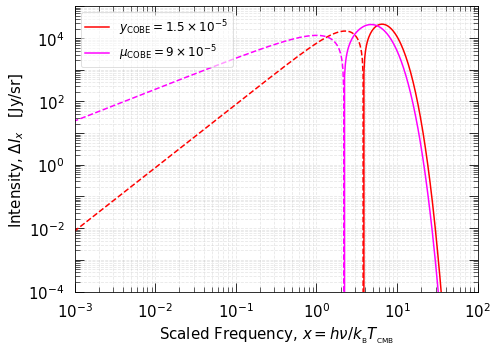

In [3]:
# plot the distortions:


fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 15
title_size = 15
legend_size = 25
handle_length = 1.5


x_min = 1e-3
x_max = 1e2

ymin = 1e-10*1e6
ymax = 1e-1*1e6

ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_ylabel(label_intensity,size=title_size)
ax.set_xlabel(label_scaled_frequency,size=title_size)
ax.yaxis.set_label_coords(-.12,0.5)

ax.plot(x_array,y_dist,c='r',alpha = 1.,label=label_y_firas)
ax.plot(x_array,-y_dist,c='r',alpha = 1.,ls='--')


ax.plot(x_array,mu_dist,c='magenta',alpha = 1.,label=label_mu_firas)
ax.plot(x_array,-mu_dist,c='magenta',alpha = 1.,ls='--')

ax.yaxis.set_major_locator(LogLocator(numticks=15)) 
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(False) #(3)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)


ax.xaxis.set_major_locator(LogLocator(numticks=15)) 
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10)))
# for label in ax.xaxis.get_ticklabels()[::2]:
#     label.set_visible(False) #(3)

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')

ax.legend(loc=2,ncol=1,frameon=True,framealpha=0.6,fontsize = 12)

fig.tight_layout()
plt.savefig(path_to_figures + '/standard_mu_and_y_dist.pdf')
plt.show()
plt.close(fig)

# Run CosmoTherm in parallel and plot results

In [2]:

# setting up the parameters:
ct = sd.cosmotherm()
ct.ct_Gamma_dec = 1e-14

ct.ct_Drho_rho_dec = 3.e-5
ct.ct_pi_energy_norm = 2
ct.ct_include_pi = 1 
ct.ct_evolve_Xe = 1
ct.ct_zend = 1e-2
ct.ct_zlate = 1e3
ct.ct_reionisation_model = 0
ct.ct_include_collisions = 0
ct.ct_emission_absorption_mode = 0
ct.ct_lyc = 1

ct.ct_npts = 3000


ct.ct_T0 = 2.7255
ct.ct_Yp = 0.245407
ct.ct_N_eff = 3.046
ct.ct_Omega_m = 0.312331
ct.ct_Omega_b = 0.0491137
ct.ct_h = 0.675422

ct.save_Xe = 'yes'


# defining which parameter values we want to compute:
p_name = 'photon injection x_dec'
xinjs = [5e-8,5e-5,5e-2,5e1,5e4]
p_array = xinjs

# the directory name fo the final spectra
ct.save_dir_name = 'many_xinj'


args = {}
args['param_values_array'] = p_array
args['param_name'] = p_name
args['save_spectra'] = 'yes'


# do the run:
# sould take a couple of minutes (~5 minutes on my laptop)
R = ct.run_cosmotherm_parallel(**args)

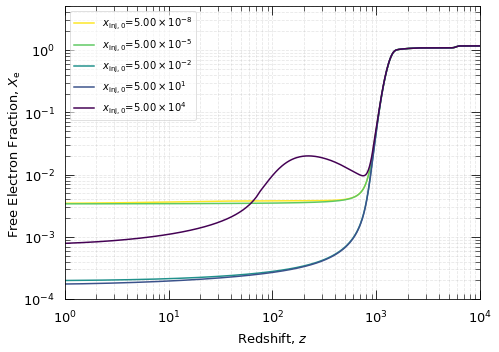

In [9]:

fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 13
title_size = 13
legend_size = 25
handle_length = 0.5



ymin=1e-4
ymax = 5e0
x_max = 1e4
x_min = 1
ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlabel(label_redshift,size=title_size)
ax.set_ylabel(label_xe,size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.yaxis.set_major_locator(LogLocator(numticks=15)) 
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) 

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) 
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) 

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')
i = 0
color=iter(cm.viridis(np.linspace(1,0,len(xinjs))))
for x in xinjs:
    ax.plot(R[i]['Xe_redshifts'],R[i]['Xe_values'],label=r'$x_\mathrm{inj,0}$='+sd.scientific_notation(x),c=next(color))
    i+=1






ax.legend(loc=2,ncol=1,frameon=True,framealpha=0.6,fontsize = 10)

fig.tight_layout()
plt.savefig(path_to_figures + '/ct_Xe_many_xinjs.pdf')
plt.show()
plt.close(fig)

In [10]:
# we have also access to the Distortions:
R[0]['DI']

array([7.38601365e-10, 7.62290443e-10, 7.86739297e-10, ...,
       2.11194839e-51, 1.30353105e-51, 8.03216351e-52])

In [11]:
sd.path_to_ct_spectra_results

'/Users/boris/Desktop/SPECDISTDIR/specdist/specdist/ct_spectra'

In [22]:
# easiest when we work with figures is to re-access the results
# from where the files have been saved:
dir_name = 'many_xinj'

fname = sd.path_to_ct_spectra_results + '/'+ dir_name + '/spectra_'+dir_name+'_Xe_values_ct.txt'
Xe = []
with open(fname) as f:
    for line in f:
        x = line.strip()
        if x:
            if not x.startswith("#"):
                l = re.split(r'[\t]',x)
                Xe.append(l)
for i in range(len(Xe)):
    Xe[i] = [float(zz) for zz in Xe[i]]
fname = sd.path_to_ct_spectra_results +  '/'+ dir_name + '/spectra_'+dir_name+'_Xe_redshifts_ct.txt'
z = []
with open(fname) as f:
    for line in f:
        x = line.strip()
        if x:
            if not x.startswith("#"):
                l = re.split(r'[\t]',x)
                z.append(l)
for i in range(len(z)):
    z[i] = [float(zz) for zz in z[i]]

fname =sd.path_to_ct_spectra_results +  '/'+ dir_name + '/spectra_'+dir_name+'_xinj_ct.txt'
xinj = []
with open(fname) as f:
    for line in f:
        x = line.strip()
        if x:
            if not x.startswith("#"):
                l = re.split(r'[\t]',x)
                xinj.append(l)
for i in range(len(z)):
    xinj[i] = [float(zz) for zz in xinj[i]]
    
fname = sd.path_to_ct_spectra_results +  '/'+ dir_name + '/spectra_'+dir_name+'_x_ct.txt'
x_ct = []
with open(fname) as f:
    for line in f:
        x = line.strip()
        if x:
            if not x.startswith("#"):
                l = re.split(r'[\t]',x)
                x_ct.append(l)
for i in range(len(z)):
    x_ct[i] = [float(zz) for zz in x_ct[i]]
    
fname = sd.path_to_ct_spectra_results +  '/'+ dir_name + '/spectra_'+dir_name+'_DI_ct.txt'
DI_ct = []
with open(fname) as f:
    for line in f:
        x = line.strip()
        if x:
            if not x.startswith("#"):
                l = re.split(r'[\t]',x)
                DI_ct.append(l)
for i in range(len(z)):
    DI_ct[i] = [float(zz) for zz in DI_ct[i]]

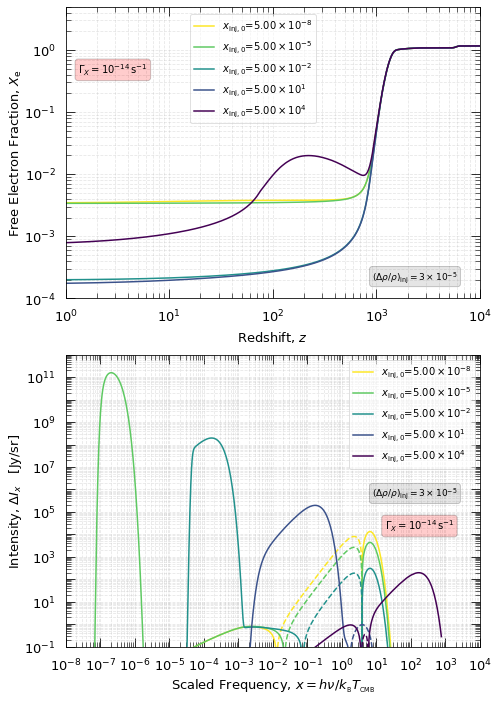

In [24]:
#fig, ax_array = plt.subplots(2,3,figsize=(30,20))
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(7,10))
label_size = 13
title_size = 13
legend_size = 25
handle_length = 0.5

ax = ax1

ymin=1e-4
ymax = 5e0
x_max = 1e4
x_min = 1
ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlabel(label_redshift,size=title_size)
ax.set_ylabel(label_xe,size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')
i = 0
color=iter(cm.viridis(np.linspace(1,0,len(xinj))))
for x in xinj:
    ax.plot(z[i],Xe[i],label=r'$x_\mathrm{inj,0}$='+sd.scientific_notation(xinj[i][0]),c=next(color))
    i+=1



ax.text(0.74, 0.1, r'$(\Delta \rho/\rho)_\mathrm{inj}=3\times10^{-5}$', transform=ax.transAxes, fontsize=9, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.2))


ax.text(0.03, 0.81, r'$\Gamma_X=$'+sd.scientific_notation(ct.ct_Gamma_dec)+r'$\,\mathrm{s}^{-1}$', transform=ax.transAxes, fontsize=10, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='r', alpha=0.2))



ax.legend(loc=(0.3,0.6),ncol=1,frameon=True,framealpha=0.6,fontsize = 10)




ax = ax2

ymin=1e-1
ymax = 1e12
x_max = 1e4
x_min = 1e-8
ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlabel(label_scaled_frequency,size=title_size)
ax.set_ylabel(label_intensity,size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


ax.yaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(False) #(3)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

# manipulate x-axis ticks and labels
ax.xaxis.set_major_locator(LogLocator(numticks=15)) #(1)
ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) #(2)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) #(3)

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')
i = 0
color=iter(cm.viridis(np.linspace(1,0,len(xinj))))

for x in xinj:
    col = next(color)
    ax.plot(x_ct[i],DI_ct[i],label=r'$x_\mathrm{inj,0}$='+sd.scientific_notation(xinj[i][0]),c=col)
    ax.plot(x_ct[i],-np.asarray(DI_ct[i]),ls='--',c=col)

    i+=1



ax.text(0.74, 0.55, r'$(\Delta \rho/\rho)_\mathrm{inj}=3\times10^{-5}$', transform=ax.transAxes, fontsize=9, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='grey', alpha=0.2))


ax.text(0.77, 0.44, r'$\Gamma_X=$'+sd.scientific_notation(ct.ct_Gamma_dec)+r'$\,\mathrm{s}^{-1}$', transform=ax.transAxes, fontsize=10, verticalalignment='top',
          bbox=dict(boxstyle='round', facecolor='r', alpha=0.2))

ax.legend(loc=1,ncol=1,frameon=True,framealpha=0.6,fontsize = 10)



fig.tight_layout()





plt.savefig(path_to_figures + '/ct_Xe_and_DI_many_xinjs.pdf')
plt.show()
plt.close(fig)

# Run CosmoRec/Recfast++ in parallel and plot results

In [70]:
# initial setup of recfast

rf = sd.recfast()
rf.rf_zstart = 5e6
rf.rf_zend = 1e-5
rf.rf_include_correction_function = 1
rf.rf_Reionization_model = 0

rf.rf_T0 = 2.7255
rf.rf_Yp = 0.245407
rf.rf_N_eff = 3.046
rf.rf_Omega_m = 0.312331
rf.rf_Omega_b = 0.0491137
rf.rf_h = 0.675422


args = {}

p_name = 'T0'
fdm_array =  [2.4255,2.5255,2.6255,2.7255,2.8255]
p_array = fdm_array

args['param_values_array'] = p_array
args['param_name'] = p_name
args['save_recfast_results'] = 'no'

R = rf.run_recfast_parallel(**args)

In [71]:
# Now R contains everything we need:
R[3]

{'T0': 2.7255,
 'z': array([5.0000000e+06, 4.9500900e+06, 4.9001800e+06, ..., 1.0260183e-02,
        1.0129256e-02, 1.0000000e-05]),
 'Xe': array([1.1637747e+00, 1.1637747e+00, 1.1637747e+00, ..., 1.7394062e-04,
        1.7394011e-04, 1.7390017e-04])}

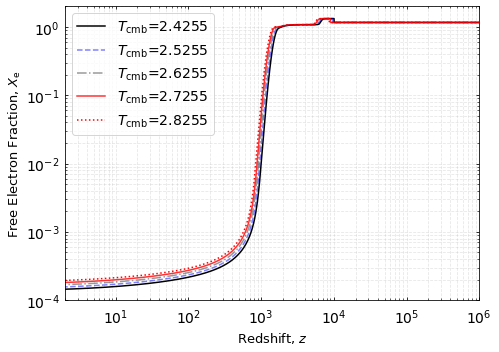

In [74]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 14
title_size = 13
legend_size = 25
handle_length = 1.5


z_asked = np.logspace(np.log10(1e-2),np.log10(60000),5000)


colors = iter(['k','b','k','r','r'])
alphas = iter([1.,0.5,.4,0.8,1.])
lss = iter(['-','--','-.','-',':',(0, (3, 1, 1, 1, 1, 1))])
labels = iter([r'$T_\mathrm{cmb}$=%.4f'%f for f in fdm_array])


for i in range(len(p_array)):
    col = next(colors)
    param =p_array[i]
    
    z = R[i]['z']
    xe = R[i]['Xe']
    
    ax.plot(z,xe,ls=next(lss),c=col,alpha = next(alphas),label=next(labels))#,c=col,ls=next(lss),alpha = next(alphas),label=next(labels))

x_min = 2.
x_max = 1.e6

ymin = 1.e-4
ymax = 2e0

ax.set_xlim(x_min,x_max)
ax.set_ylim(ymin,ymax)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlabel(label_redshift,size=title_size)
ax.set_ylabel(label_xe,size=title_size)


ax.yaxis.set_label_coords(-.1,0.5)

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=2)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=2)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=3,labelsize=label_size,pad=5)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=3,labelsize=label_size,pad=7)

plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)

ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
ax.xaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=1000))
locmin = ticker.LogLocator(base=10.0, subs=np.arange(2, 10) ,
                                      numticks=12)
ax.xaxis.set_minor_locator(locmin)
ax.yaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(ticker.NullFormatter())
ax.yaxis.set_minor_formatter(ticker.NullFormatter())

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')



ax.legend(loc=2,ncol=1,fontsize=14)

ax.loglog()

fig.tight_layout()
plt.savefig(path_to_figures + '/recfast_many_Tcmb.pdf')
plt.show()
plt.close(fig)


# Make a movie of spectra using the photon injection library

In [6]:
subprocess.call(['mkdir','-p',sd.path_to_sd_projects+'/specdist/specdist/data/ct_database'])

0

In [9]:
# copy the library folder 'case_extended_run_xe_history_Drho_rho_3e-5_zlate_1e3_without_collision_190820'
# to the ct_database directory (you need to downliad the library)
# then load the library:
# (this takes a couple of minutes, the libray is 5GB size)
sd_lib_extended_run = sd.specdist_ct_spectra_lib()
sd.load_ct_spectra_lib('extended_run_xe_history_Drho_rho_3e-5_zlate_1e3_without_collision_190820',sd_lib_extended_run)



In [ ]:

Gamma_values= np.logspace(-8,-17,70)
xdec_values = [1e-3]


for ig in range(len(xdec_values)):
    for ix in range(len(xdec_values)):
        gamma = Gamma_values[ix]
        str_gamma = str("%.3e"%gamma)
        print(str_gamma)
        xdec = xdec_values[ig]
        str_xdec = "%.3e"%xdec
        print(str_xdec)

        B_nu = np.vectorize(sd.B_nu_of_T)
        i = 0
        nx = len(Gamma_values)
        x = []
        y = []
        xinj = []
        gammainj = []
        fdm_values = []
        for k in range(nx):
            gamma = Gamma_values[k]
            xinj.append(xdec)
            gammainj.append(gamma)
            x_asked = np.logspace(np.log10(1e-8),np.log10(1e8),3000)


            S_pectra = sd.GetSpectra(gamma,xdec,x_asked,sd_lib_extended_run)
            x.append(S_pectra['x'])
            y.append(S_pectra['DI'])

        x_min = 1.e-7
        x_max = 1.e3

        fig, ax1 = plt.subplots(1,1,figsize=(8,6))
        label_size = 15
        title_size = 20
        legend_size = 25
        handle_length = 1.5

        ymin = 1.e-2
        ymax = 2e11


        linesp = []
        patches = []


        i_ax = 0
        firas = sd.firas()


        for ax in [ax1]:
            ax.set_xlim(x_min,x_max)
            ax.set_ylim(ymin,ymax)
            ax.set_xscale('log')
            ax.set_yscale('log')

            ax.set_xlabel(label_scaled_frequency,size=title_size)
            ax.set_ylabel(label_intensity,size=title_size)
            ax.yaxis.set_label_coords(-.1,0.5)


            ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
            ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=10)

            plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
            plt.setp(ax.get_xticklabels(), fontsize=label_size)

            ax.xaxis.set_ticks_position('both')
            ax.yaxis.set_ticks_position('both')


            ax.axvspan(1.e-3, 2e-3, facecolor='blue', alpha=0.2,label=r'$\mathrm{EDGES}$')
            ax.axvspan(0.5, 105, facecolor='orange', alpha=0.2,label=r'$\mathrm{PIXIE}$')
            ax.axvspan(1.2, 11.2, facecolor='red', alpha=0.2,label=r'$\mathrm{FIRAS}$')

            x_asked = np.logspace(np.log10(x_min),np.log10(x_max),1000)

            bnu = B_nu(x_asked*sd.kb*sd.firas_T0_bf/sd.hplanck,sd.firas_T0_bf)*1e6
            ax.plot(x_asked,bnu,c='grey',ls=':',label='Black Body at T=2.725K')

            Y = sd.GetYSpecDistAtTandX(firas.firas_y_1996_95_cl,sd.firas_T0_bf,x_asked)*1e6
            ax.plot(x_asked,Y,c='r',alpha = 0.2,label = label_y_firas)
            ax.plot(x_asked,-Y,c='r',ls='--',alpha = 0.4)

            MU_chluba = sd.GetMuSpecDistAtTandX_chluba(firas.firas_mu_1996_95_cl,sd.firas_T0_bf,x_asked)*1e6
            ax.plot(x_asked,MU_chluba,c='magenta',alpha = 0.2,label=label_mu_firas)
            ax.plot(x_asked,-MU_chluba,c='magenta',ls='--',alpha = 0.4)

            ax.yaxis.set_major_locator(LogLocator(numticks=15)) 
            ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
            for label in ax.yaxis.get_ticklabels()[::2]:
                label.set_visible(True) 

            ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
            ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
            ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
            ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

            ax.xaxis.set_major_locator(LogLocator(numticks=15)) 
            ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
            for label in ax.xaxis.get_ticklabels()[::2]:
                label.set_visible(True) 

            ax.grid( b=True, which="both", alpha=0.3, linestyle='--')    
            ax.legend(loc=1)


            i_ax = i_ax + 1


        linesp1 = [ax1.plot([], [],c='k',ls='-')[0] for _ in range(1)]
        linesm1 = [ax1.plot([], [],c='k',ls='--')[0] for _ in range(1)]
        text_gamma =  [ax.text(0.05, 0.15, r'$z= %.4e$'%1, transform=ax.transAxes, fontsize=14, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))]
        patches1 = linesp1 +linesm1 + text_gamma 


        patches = patches1




        def init():

            for line in linesp1:
                line.set_data([], [])

            return patches

        def animate(i):
            for j,line in enumerate(linesp1):
                if j==0:
                    line.set_data(x[i],y[i])
            for j,line in enumerate(linesm1):
                if j==0:
                    line.set_data(x[i],-y[i])
                text_gamma[j].remove()
                einj = xinj_to_Einj*xdec
                text_gamma_str1 = r'$z=0$'
                text_gamma_str2 = r'$E_\mathrm{inj}=$'+ sd.scientific_notation(einj)+' '+r'$\mathrm{eV}$'
                text_gamma_str3 = r'$x_\mathrm{inj,0}=$'+ sd.scientific_notation(xinj[i])
                text_gamma_str4 = r'$\Gamma_X=$'+ sd.scientific_notation(gammainj[i])+' '+r'$\mathrm{s}^{-1}$'
                text_gamma_str = '\n'.join((text_gamma_str4,
                                            text_gamma_str3,
                                            text_gamma_str2,
                                            text_gamma_str1))

                text_gamma[j] = ax.text(0.35, 0.95, text_gamma_str , transform=ax.transAxes, fontsize=12, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

            return patches


        fig.tight_layout()




        anim = animation.FuncAnimation(fig, animate, init_func=init,
                                       frames=len(y), interval=800, blit=True)

        anim.save(path_to_figures + '/Dn_today_movie_Drho_rho_3e-5_xinj_'+str_xdec+'.mp4', fps=3, extra_args=['-vcodec', 'libx264'],dpi=100)
        i+=1

1.000e-08
1.000e-03


/Users/boris/anaconda3/lib/python3.7/site-packages/specdist-0.1-py3.7.egg/specdist/standard_mu_and_y_distortions.py:21: RuntimeWarning: invalid value encountered in double_scalars
  result = B_nu_of_T(NU,T)/T*(hplanck*NU/kb/T)*np.exp(hplanck*NU/kb/T)/(np.exp(hplanck*NU/kb/T)-1.)
